<a href="https://colab.research.google.com/github/Sukruthr/Company-Bankruptcy-Prediction/blob/main/COMPANY_BANKRUPTCY_PREDICTION_(_Final_TeamNotebook_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Prediction of bankruptcy is a phenomenon of increasing interest to firms who
stand to loose money because on unpaid debts. Since computers can store huge dataset
pertaining to bankruptcy making accurate predictions from them before hand is becoming
important. 

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

 In this project you will use various classification algorithms on bankruptcy
dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Attribute Information**

Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

Y - Bankrupt?: Class label 1 : Yes , 0: No 

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
path = '/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Supervised ML (Classification) - COMPANY BANKRUPTCY PREDICTION/COMPANY BANKRUPTCY PREDICTION.csv'
df=pd.read_csv(path)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.options.display.float_format = '{:,.6f}'.format
from imblearn.ensemble import BalancedBaggingClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# BANKRUPTCY PREDICTION

##Initial EDA

In [8]:
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.000000,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,"4,980,000,000.000000",0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,"701,000,000.000000","6,550,000,000.000000",0.593831,"458,000,000.000000",0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.000000,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,"6,110,000,000.000000",0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,0.001384,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,0.000107,"7,700,000,000.000000",0.593916,"2,490,000,000.000000",0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,0.000236,"25,500,000.000000",0.458521,0.000790,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,"7,280,000,000.000000",0.0003

In [9]:
# data shape
df.shape 

(6819, 96)

<!-- **Dataset is consist of 6819 rows and 96 features including the dependent variable** -->

In [10]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [11]:
# data description
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,"6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000",...,"6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000","6,819.000000"
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,"1,995,347,312.802792","1,950,427,306.056799",0.467431,"16,448,012.905942",0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,"1,328,640.602096",0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,"5,508,096,595.248731","1,566,212.055241",0.264248,0.379677,"403,284.954245","8,376,594.819685",0.630991,"4,416,336.714259",0.113177,0.886823,0.008783,...,0.522273,0.124095,"3,592,902.196830","37,159,994.147133",0.090673,0.353828,0.277395,"55,806,804.525780",0.761599,0.73581

<h2> Checking for Missing Values

In [12]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [13]:
# sum all null values across all cols
df.isnull().sum().sum()

0

**There are no missing values in our dataset i.e 0 Non-Null value**

In [14]:
df.duplicated().sum()

0

**There are no duplicated values in the dataset as well.**

## <h2>Checking for Categorical features with less than equal to 10 categories.

In [15]:
#creating a for loop to get the categorical columns with 10 or less than 10 unique values
list_1=[]
for i in df.columns:
  x=df[i].value_counts()
  if len(x)<=15:
    list_1.append(i)
  else:
    continue
list_1

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

**We've found only 2 categorical features.**

In [16]:
df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

**Liability-Assets Flag consist of 2 unique values with high imabalance**

In [17]:
df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

**Net Income Flag consist of only 1 unique values. Hence, we're dropping both categorical features.**

In [18]:
df.drop(columns=[' Net Income Flag', ' Liability-Assets Flag'],inplace=True)

In [19]:
# shape of our data after droping 2 cols (Net Income Flag, Liability-Assets Flag)
df.shape

(6819, 94)

## <h2> Base-Model Building

In [20]:
# seperating to X & Y before test-train-split
X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?']

In [21]:
X.shape

(6819, 93)

In [22]:
Y.shape

(6819,)

In [23]:
# *Train and Test Split of the Dataset:-*

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,Y,test_size=0.20, random_state=0, stratify=Y)

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# x_train_norm = scaler.fit_transform(x_train)
x_train_norm = scaler.fit_transform(train_X)
x_test_norm = scaler.transform(test_X)

In [24]:
x_train_norm.shape

(5455, 93)

In [25]:
#creating a dataframe consisting of different metrics along with the Algorithms used.
metric_report = pd.DataFrame(columns = ['logistic_regression','random_forest','SVM','gaussian_naive_bayes','KNN','XGBOOST'], index = ['test_acc','train_acc','test_precision','train_precision','test_recall','train_recall','test_f1-score','train_f1-score','test_auc','train_auc'])

In [26]:
#Generating Evaluation Matrix
def metricCalc(y_acc_test,y_acc_train,y_predicts_test,y_predicts_train,classifier_name,y_test_prob ,y_train_prob):

  # calculate test and train - accuracy,recall,precesion, confusion_matrix. auc-score, f1 score of any given model
  train_accuracy = accuracy_score(y_acc_train,y_predicts_train)
  test_accuracy = accuracy_score(y_acc_test,y_predicts_test)

  train_cm = confusion_matrix(y_acc_train,y_predicts_train)
  test_cm = confusion_matrix(y_acc_test,y_predicts_test )

  prec_train = train_cm[1][1]/(train_cm[1][1] + train_cm[0][1])
  prec_test = test_cm[1][1]/(test_cm[1][1] + test_cm[0][1])

  recall_train = train_cm[1][1]/(train_cm[1][0] + train_cm[1][1])
  recall_test = test_cm[1][1]/(test_cm[1][0] + test_cm[1][1])

  f1_train = (2*prec_train*recall_train)/(recall_train + prec_train)
  f1_test = (2*prec_test*recall_test)/(recall_test + prec_test)

  auc_train = roc_auc_score(y_acc_train,y_train_prob)
  auc_test = roc_auc_score(y_acc_test,y_test_prob)

  # a list of all scores 
  eval_list = [test_accuracy,train_accuracy,prec_test,prec_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train]
  # update respective model scores in metric df
  metric_report[classifier_name] = eval_list

In [27]:
# function that stores all the hyperparameters along with cross validation.
def modelGridSearchParams():

  # a dict that stores the params of the best models
  best_models = {}

  # ||| X----------------------------------------------------------------------------------------------------------------------X ||| #

  # grid search for Logistic Regression
  model = LogisticRegression(class_weight='balanced',C=0.01)
  solvers = ['lbfgs']
  penalty = ['l2']
  c_values = [100, 10, 1.0, 0.1, 0.01]

  grid = dict(solver = solvers,penalty=penalty,C=c_values)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
  grid_result = grid_search.fit(x_train_norm, train_y)

  best_models['lr_model'] = grid_result.best_estimator_

  # ||| X----------------------------------------------------------------------------------------------------------------------X ||| #

  # Random Forest

  # Number of trees
  n_estimators = [100,250]
  # Maximum depth of trees
  max_depth = [4,6,8]
  # Minimum number of samples required to split a node
  min_samples_split = [50,100,150]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [40,50]
  # HYperparameter Grid
  param_dict = {'n_estimators' : n_estimators,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf}

  rf_model = RandomForestClassifier(class_weight='balanced')

  # Grid search
  rf_grid = GridSearchCV(estimator=rf_model,
                        param_grid = param_dict,
                        cv = 5, verbose=2, scoring='roc_auc')

  rf_grid.fit(x_train_norm,train_y)

  best_models['rf_model'] = rf_grid.best_estimator_

  # ||| X----------------------------------------------------------------------------------------------------------------------X ||| #

  # SVM
  svm_clf = SVC(probability=True, kernel='linear',class_weight='balanced')
  svm_clf.fit(x_train_norm,train_y)
  parameters = {'C':np.linspace(0.1,0.01,1), 'gamma':('scale','auto')}
  clf_grid = GridSearchCV(estimator = svm_clf, param_grid = parameters)
  #till here
  best_models['svm_model'] = clf_grid

  # ||| X----------------------------------------------------------------------------------------------------------------------X ||| #

  # XGBoost
  # Number of trees
  n_estimators = [50,80,100,250]
  # Maximum depth of trees
  max_depth = [4,6,8,12]
  # Minimum number of samples required to split a node
  min_samples_split = [50,100,150]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [40,50]
  # HYperparameter Grid
  param_dict = {'n_estimators' : n_estimators,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf}
  clf_xgb = XGBClassifier(scale_pos_weight=102)

# random search
  xg_grid = RandomizedSearchCV(clf_xgb,param_dict,cv = 5, verbose=2, scoring='roc_auc')
  xg_grid.fit(x_train_norm,train_y)

  best_models['xgb_model'] = xg_grid.best_estimator_

  return best_models

In [28]:
# function that calculate the model results and stores in metric report.
def model_result(train_X,test_X,train_y,test_y):

  # get the best models after grid search
  best_models = modelGridSearchParams()

  # |||----------------------------------------------------------------------------------------------------------------------||| #

  # Logistic Regression:

  lr_class_train_pred = best_models['lr_model'].predict(train_X)
  lr_class_test_pred = best_models['lr_model'].predict(test_X)

  lr_prob_train_pred = best_models['lr_model'].predict_proba(train_X)[:,1]
  lr_prob_test_pred = best_models['lr_model'].predict_proba(test_X)[:,1]


# |||----------------------------------------------------------------------------------------------------------------------||| #

  # Random Forest

  rf_class_train_pred = best_models['rf_model'].predict(train_X)
  rf_class_test_pred = best_models['rf_model'].predict(test_X)

  rf_prob_train_pred = best_models['rf_model'].predict_proba(train_X)[:,1]
  rf_prob_test_pred = best_models['rf_model'].predict_proba(test_X)[:,1]

# |||----------------------------------------------------------------------------------------------------------------------||| #

  # SVM
  svm_clf = best_models['svm_model'].fit(train_X,train_y)

  svm_class_train_pred = svm_clf.predict(train_X)
  svm_class_test_pred = svm_clf.predict(test_X)

  svm_prob_train_pred = svm_clf.predict_proba(train_X)[:,1]
  svm_prob_test_pred = svm_clf.predict_proba(test_X)[:,1]


# |||----------------------------------------------------------------------------------------------------------------------||| #

  # Naive Bayes
  nbc = GaussianNB().fit(train_X, train_y)
  nbc_class_train_pred = nbc.predict(train_X)
  nbc_class_test_pred = nbc.predict(test_X)
  
  nbc_prob_train_pred = svm_clf.predict_proba(train_X)[:,1]
  nbc_prob_test_pred = svm_clf.predict_proba(test_X)[:,1]


# |||----------------------------------------------------------------------------------------------------------------------||| #

  # KNN
  knn = KNeighborsClassifier(n_neighbors=2,weights='uniform').fit(train_X,train_y)
  knn_class_train_pred = knn.predict(train_X)
  knn_class_test_pred = knn.predict(test_X)

  knn_prob_train_pred = knn.predict_proba(train_X)[:,1]
  knn_prob_test_pred = knn.predict_proba(test_X)[:,1]


# |||----------------------------------------------------------------------------------------------------------------------||| #

# XGB
  xg_class_train_pred = best_models['xgb_model'].predict(train_X)
  xg_class_test_pred =  best_models['xgb_model'].predict(test_X)

  xg_prob_train_pred =  best_models['xgb_model'].predict_proba(train_X)[:,1]
  xg_prob_test_pred =  best_models['xgb_model'].predict_proba(test_X)[:,1]


# Calculating the scores of all the models
  metricCalc(test_y,train_y,lr_class_test_pred,lr_class_train_pred,'logistic_regression',lr_prob_test_pred,lr_prob_train_pred)
  metricCalc(test_y,train_y,rf_class_test_pred,rf_class_train_pred,'random_forest',rf_prob_test_pred,rf_prob_train_pred)
  metricCalc(test_y,train_y,svm_class_test_pred,svm_class_train_pred,'SVM',svm_prob_test_pred,svm_prob_train_pred)
  metricCalc(test_y,train_y,nbc_class_test_pred,nbc_class_train_pred,'gaussian_naive_bayes',nbc_prob_test_pred,nbc_prob_train_pred)
  metricCalc(test_y,train_y,knn_class_test_pred,knn_class_train_pred,'KNN',knn_prob_test_pred,knn_prob_train_pred)
  metricCalc(test_y,train_y,xg_class_test_pred,xg_class_train_pred,'XGBOOST',xg_prob_test_pred,xg_prob_train_pred)

  # report
  return metric_report

In [29]:
x_train_norm = scaler.fit_transform(train_X)
x_test_norm = scaler.transform(test_X)

In [30]:
model_result(x_train_norm,x_test_norm,train_y,test_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250, total=   2.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250, total=   2.7s
[CV] max_depth=4, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  6.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   4.2s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   4.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   4.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   4.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   4.1s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=50, max_depth=4, total=   2.3s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=50, max_depth=4, total=   2.4s
[CV] n_estimators=80, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished


,logistic_regression,random_forest,SVM,gaussian_naive_bayes,KNN,XGBOOST
test_acc,0.872434,0.906891,0.864370,0.316716,0.967742,0.964809
train_acc,0.880110,0.919707,0.878460,0.338955,0.975069,1.000000
test_precision,0.171717,0.209790,0.165877,0.042268,0.500000,0.444444
train_precision,0.198992,0.270979,0.198265,0.045816,1.000000,1.000000
test_recall,0.772727,0.681818,0.795455,0.931818,0.090909,0.363636
train_recall,0.897727,0.880682,0.909091,0.982955,0.227273,1.000000
test_f1-score,0.280992,0.320856,0.274510,0.080868,0.153846,0.400000
train_f1-score,0.325773,0.414439,0.325534,0.087551,0.370370,1.000000
test_auc,0.909220,0.939807,0.906465,0.906465,0.662328,0.927256
train_auc,0.956960,0.972684,0.953125,0.953125,0.991583,1.000000


## <h2> Handling Outliers

In [31]:
#taking out all the columns except dependent variable.
columns = df.columns[1:].tolist()

In [39]:
df10_ = df.iloc[:,1:].copy()
# X = df1
# Y = df['Bankrupt?']

In [33]:
#X.columns.tolist()
# Y.value_counts()

In [34]:
# Removing Outliers.

# Q3 = X.quantile(0.75)
# Q1 = X.quantile(0.25)
# IQR = Q3 - Q1
# X = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
# df1['Bankrupt?'].value_counts()

Tried Removing Outlier but won't work in this case due to huge no of features.

## <h2>Capping Outliers

In [36]:
# capping the outliers.

for col in columns:
  Q3 = df[col].quantile(0.75)
  Q1 = df[col].quantile(0.25)
  IQR = Q3 - Q1
  df.loc[(df[col] > Q3 + (1.5*IQR)),col] = Q3 
  df.loc[(df[col] < Q1 - (1.5*IQR)),col] = Q1

In [37]:
# all the values remain intact
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

## <h2> Bivariate Analysis

<h3> Between Independent and Dependent Variable

<Figure size 648x432 with 0 Axes>

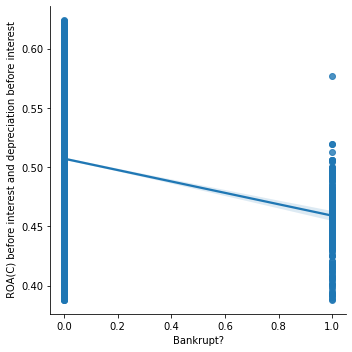

<Figure size 648x432 with 0 Axes>

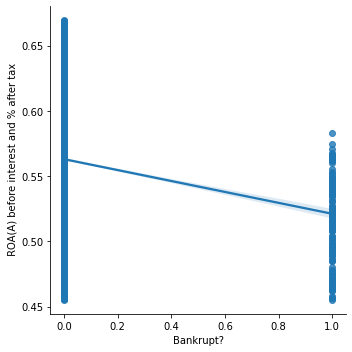

<Figure size 648x432 with 0 Axes>

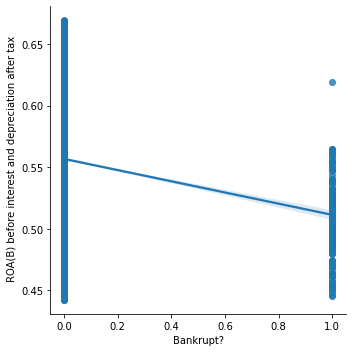

<Figure size 648x432 with 0 Axes>

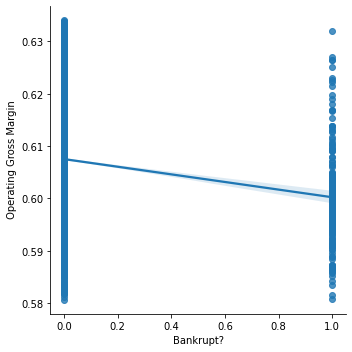

<Figure size 648x432 with 0 Axes>

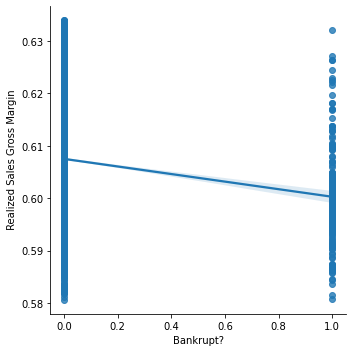

<Figure size 648x432 with 0 Axes>

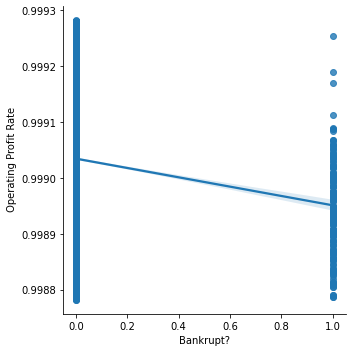

<Figure size 648x432 with 0 Axes>

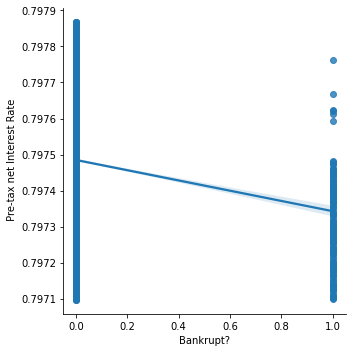

<Figure size 648x432 with 0 Axes>

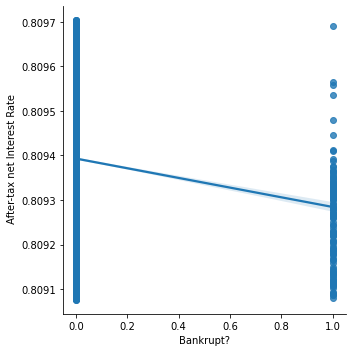

<Figure size 648x432 with 0 Axes>

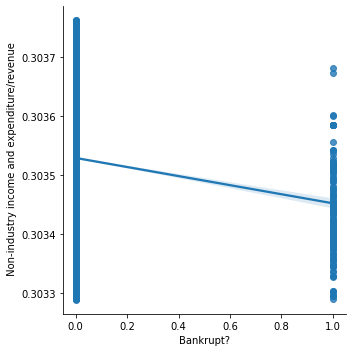

<Figure size 648x432 with 0 Axes>

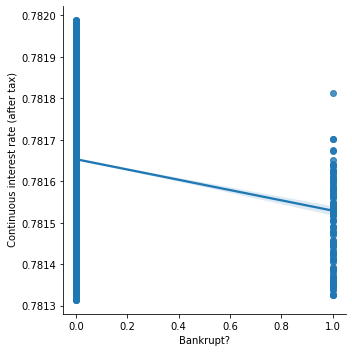

<Figure size 648x432 with 0 Axes>

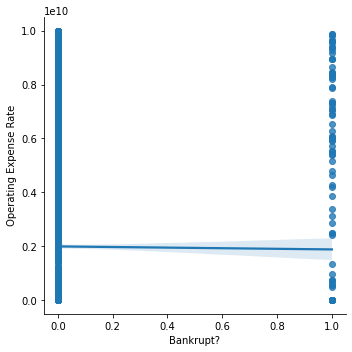

<Figure size 648x432 with 0 Axes>

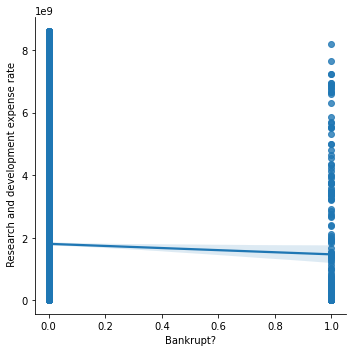

<Figure size 648x432 with 0 Axes>

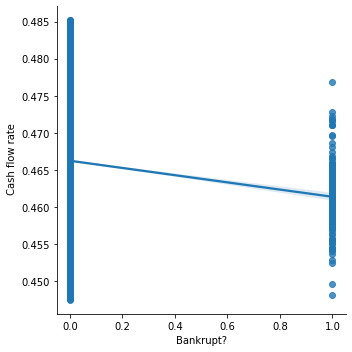

<Figure size 648x432 with 0 Axes>

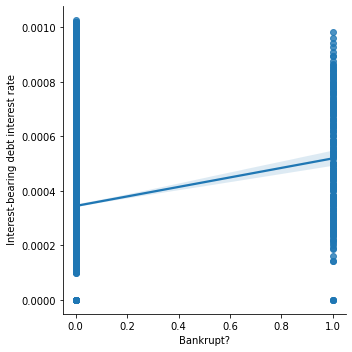

<Figure size 648x432 with 0 Axes>

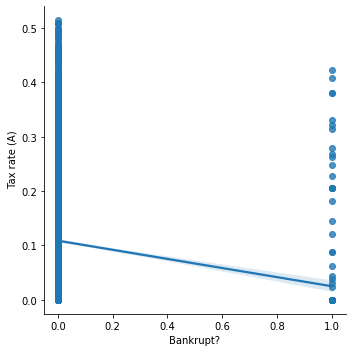

<Figure size 648x432 with 0 Axes>

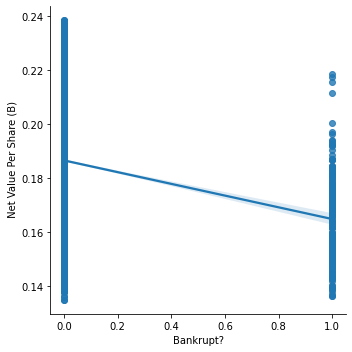

<Figure size 648x432 with 0 Axes>

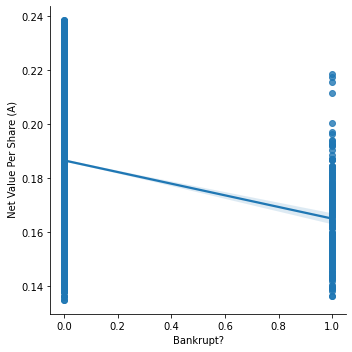

<Figure size 648x432 with 0 Axes>

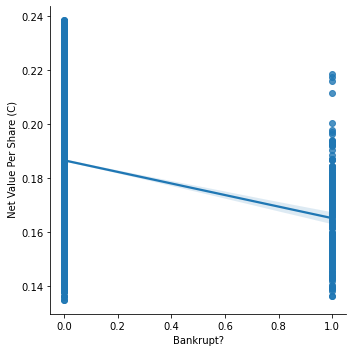

<Figure size 648x432 with 0 Axes>

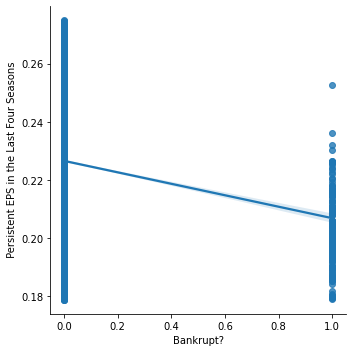

<Figure size 648x432 with 0 Axes>

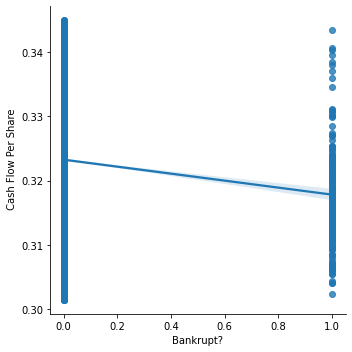

<Figure size 648x432 with 0 Axes>

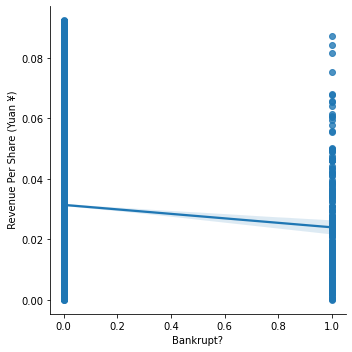

<Figure size 648x432 with 0 Axes>

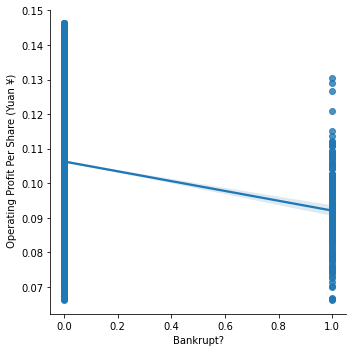

<Figure size 648x432 with 0 Axes>

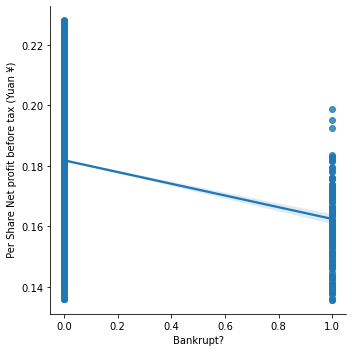

<Figure size 648x432 with 0 Axes>

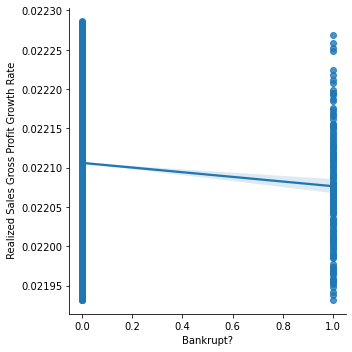

<Figure size 648x432 with 0 Axes>

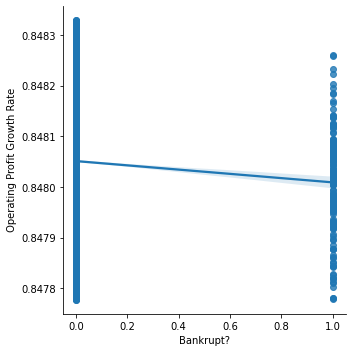

<Figure size 648x432 with 0 Axes>

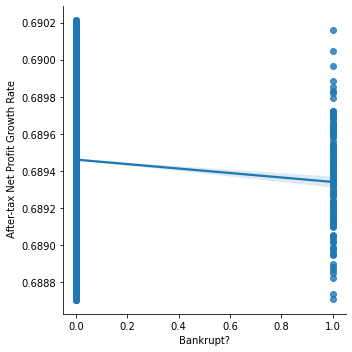

<Figure size 648x432 with 0 Axes>

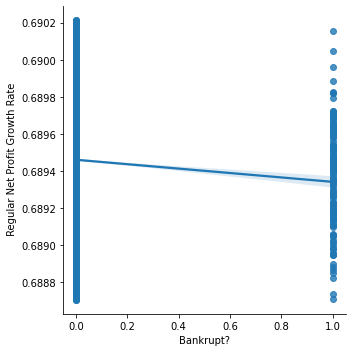

<Figure size 648x432 with 0 Axes>

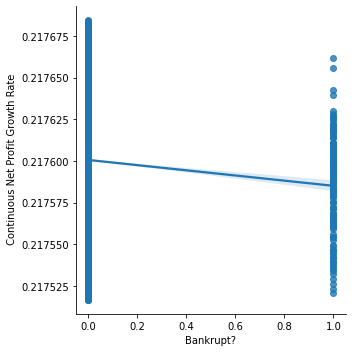

<Figure size 648x432 with 0 Axes>

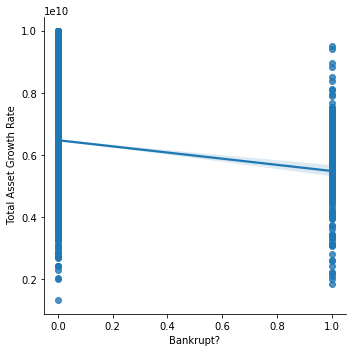

<Figure size 648x432 with 0 Axes>

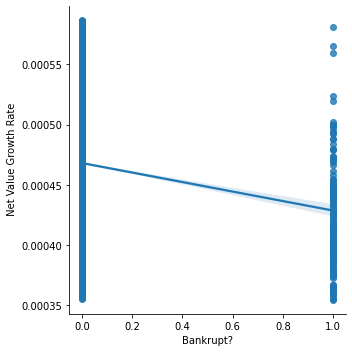

<Figure size 648x432 with 0 Axes>

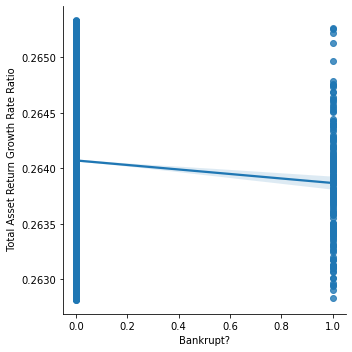

<Figure size 648x432 with 0 Axes>

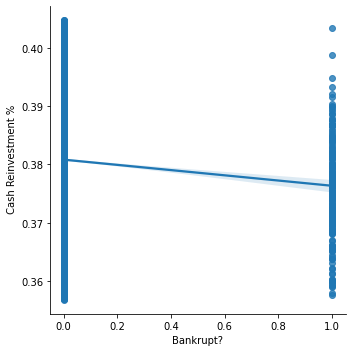

<Figure size 648x432 with 0 Axes>

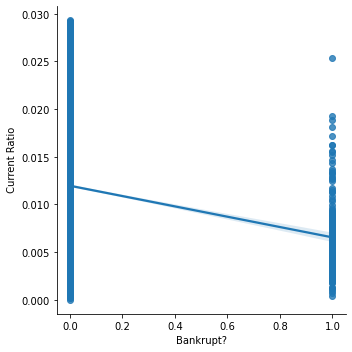

<Figure size 648x432 with 0 Axes>

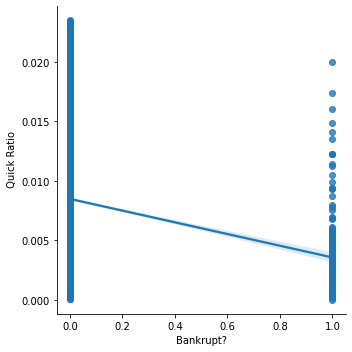

<Figure size 648x432 with 0 Axes>

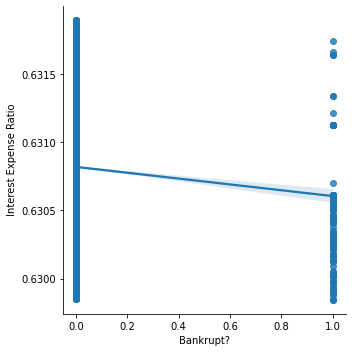

<Figure size 648x432 with 0 Axes>

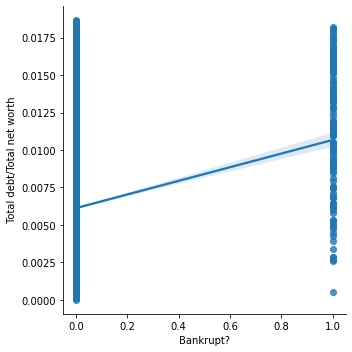

<Figure size 648x432 with 0 Axes>

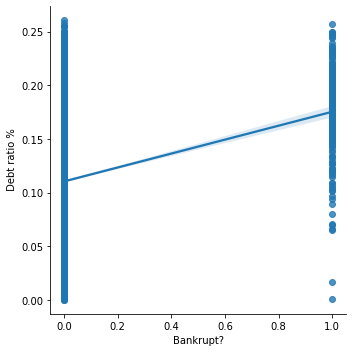

<Figure size 648x432 with 0 Axes>

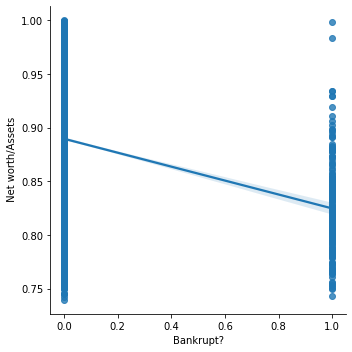

<Figure size 648x432 with 0 Axes>

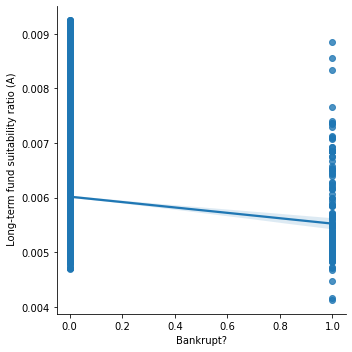

<Figure size 648x432 with 0 Axes>

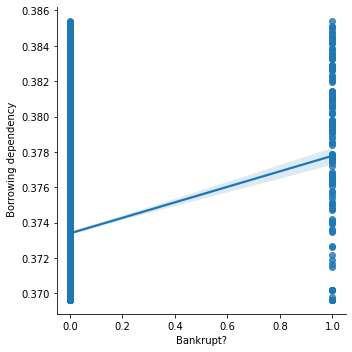

<Figure size 648x432 with 0 Axes>

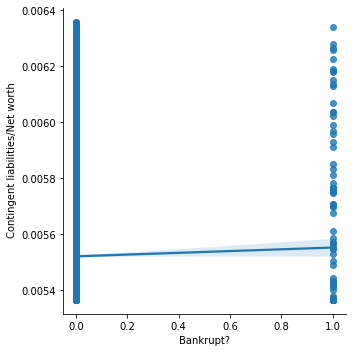

<Figure size 648x432 with 0 Axes>

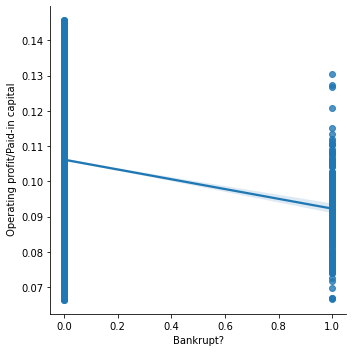

<Figure size 648x432 with 0 Axes>

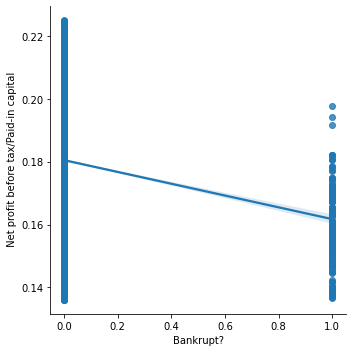

<Figure size 648x432 with 0 Axes>

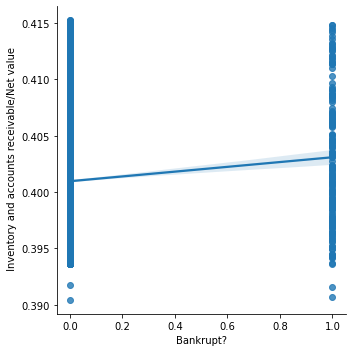

<Figure size 648x432 with 0 Axes>

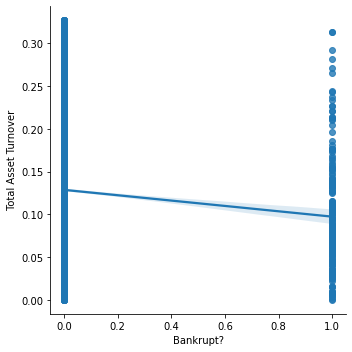

<Figure size 648x432 with 0 Axes>

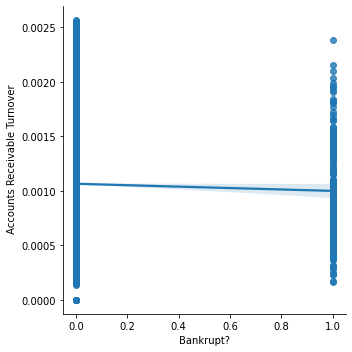

<Figure size 648x432 with 0 Axes>

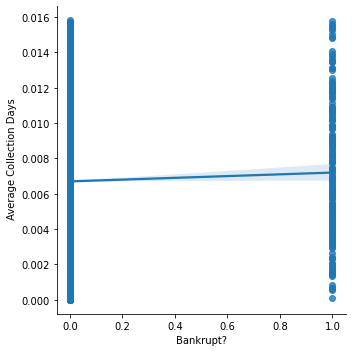

<Figure size 648x432 with 0 Axes>

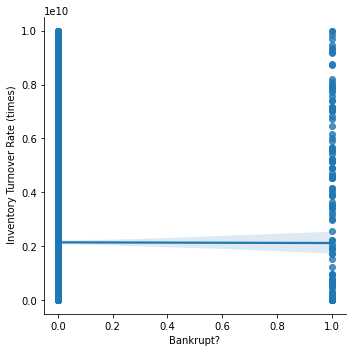

<Figure size 648x432 with 0 Axes>

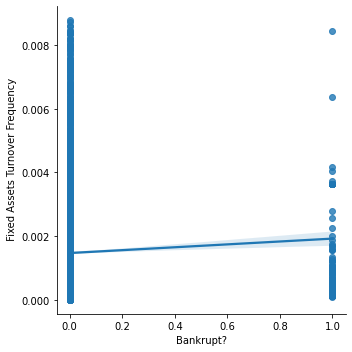

<Figure size 648x432 with 0 Axes>

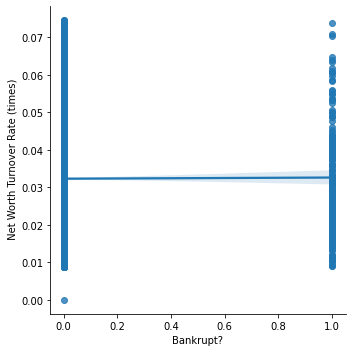

<Figure size 648x432 with 0 Axes>

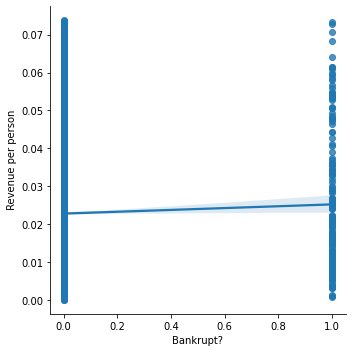

<Figure size 648x432 with 0 Axes>

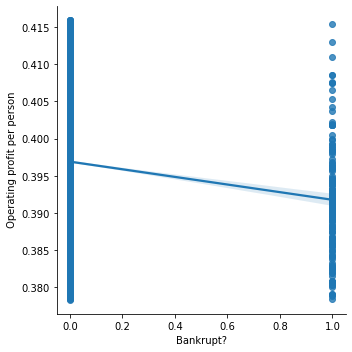

<Figure size 648x432 with 0 Axes>

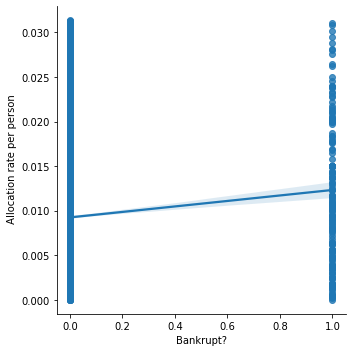

<Figure size 648x432 with 0 Axes>

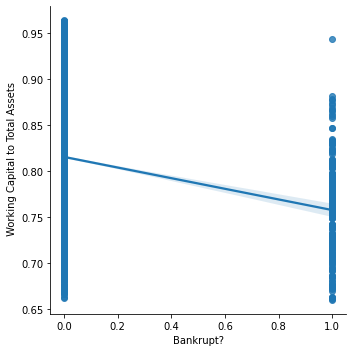

<Figure size 648x432 with 0 Axes>

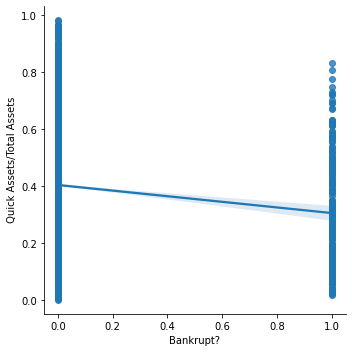

<Figure size 648x432 with 0 Axes>

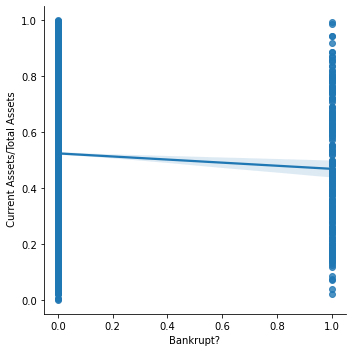

<Figure size 648x432 with 0 Axes>

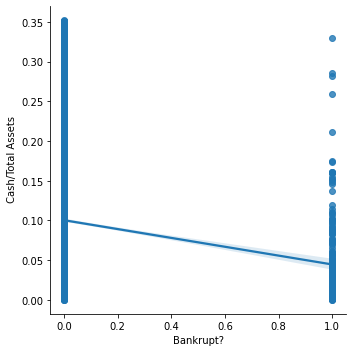

<Figure size 648x432 with 0 Axes>

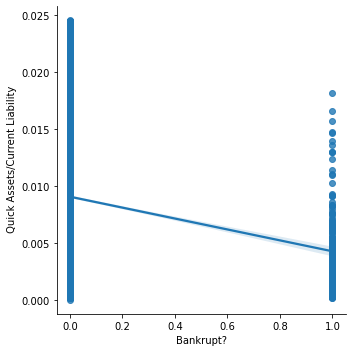

<Figure size 648x432 with 0 Axes>

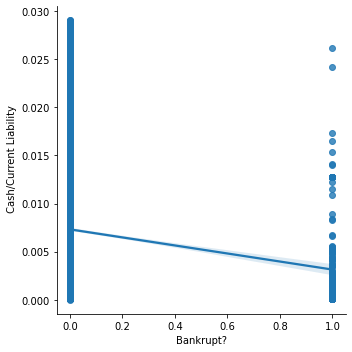

<Figure size 648x432 with 0 Axes>

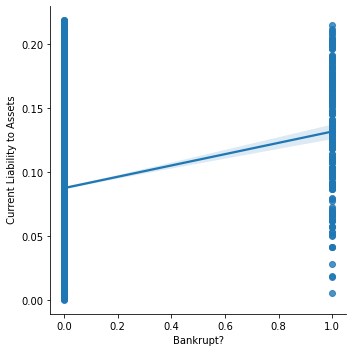

<Figure size 648x432 with 0 Axes>

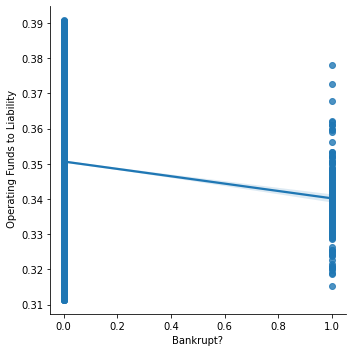

<Figure size 648x432 with 0 Axes>

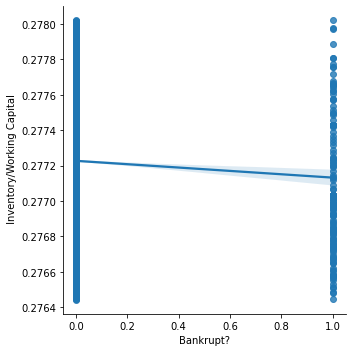

<Figure size 648x432 with 0 Axes>

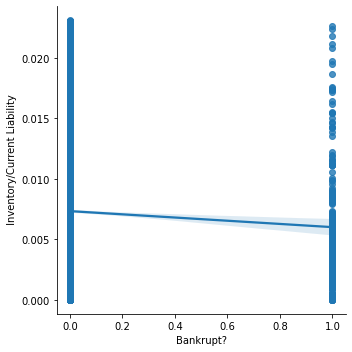

<Figure size 648x432 with 0 Axes>

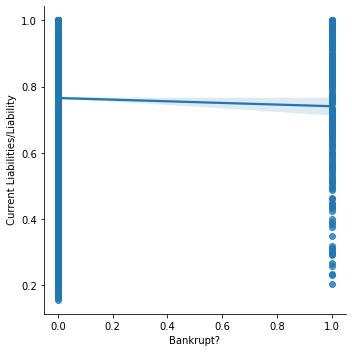

<Figure size 648x432 with 0 Axes>

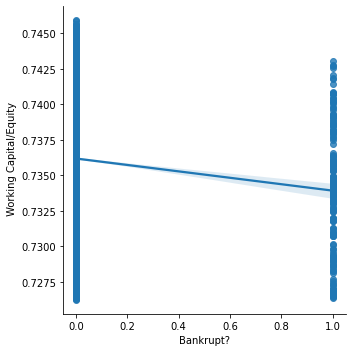

<Figure size 648x432 with 0 Axes>

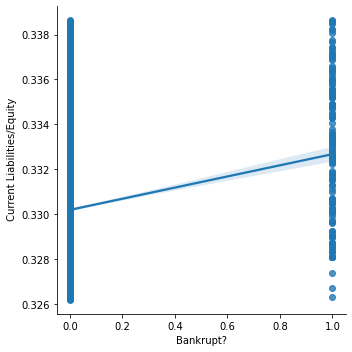

<Figure size 648x432 with 0 Axes>

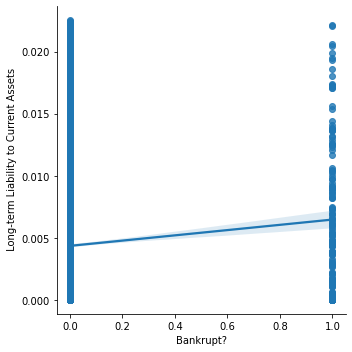

<Figure size 648x432 with 0 Axes>

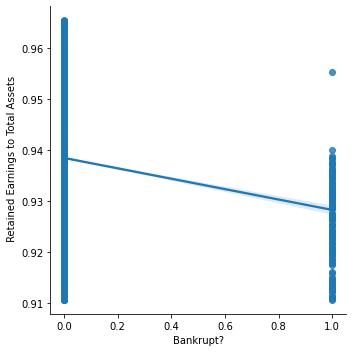

<Figure size 648x432 with 0 Axes>

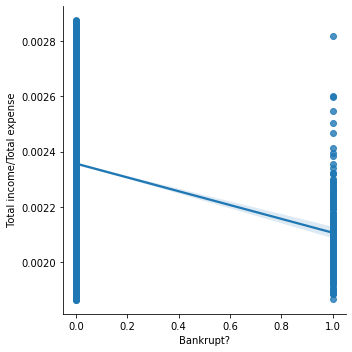

<Figure size 648x432 with 0 Axes>

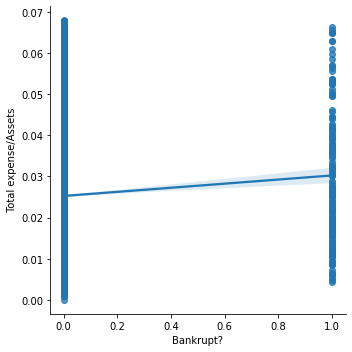

<Figure size 648x432 with 0 Axes>

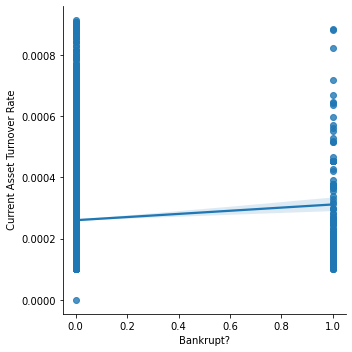

<Figure size 648x432 with 0 Axes>

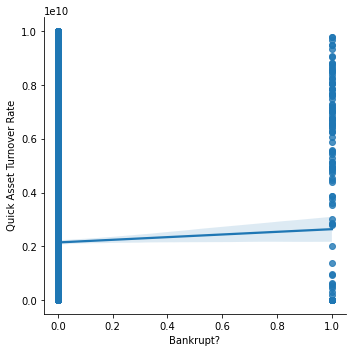

<Figure size 648x432 with 0 Axes>

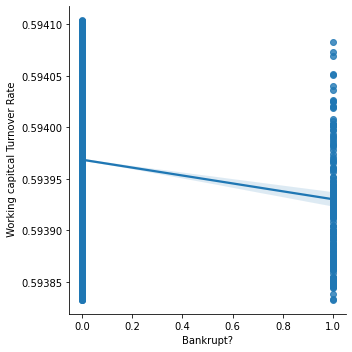

<Figure size 648x432 with 0 Axes>

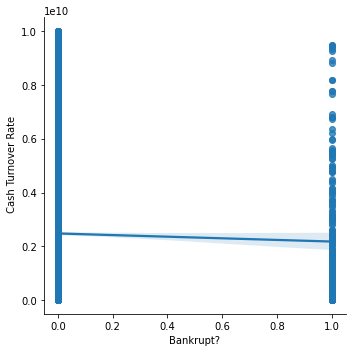

<Figure size 648x432 with 0 Axes>

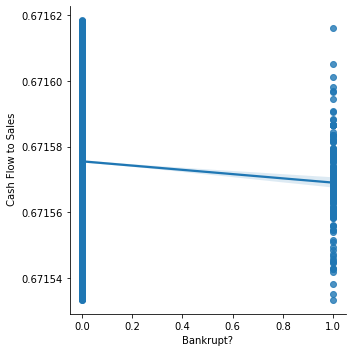

<Figure size 648x432 with 0 Axes>

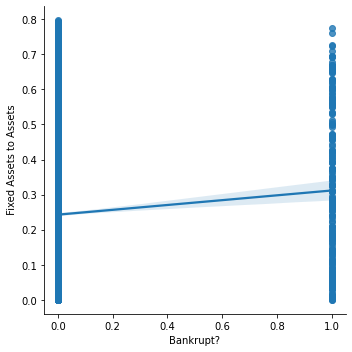

<Figure size 648x432 with 0 Axes>

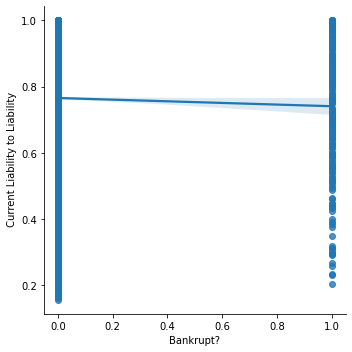

<Figure size 648x432 with 0 Axes>

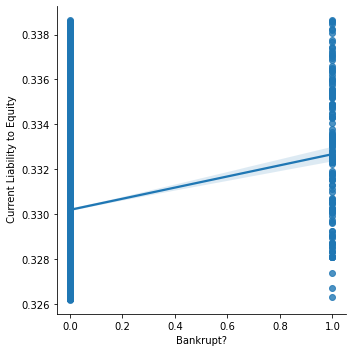

<Figure size 648x432 with 0 Axes>

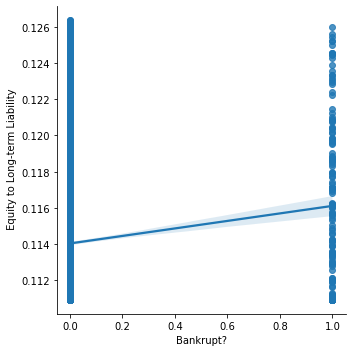

<Figure size 648x432 with 0 Axes>

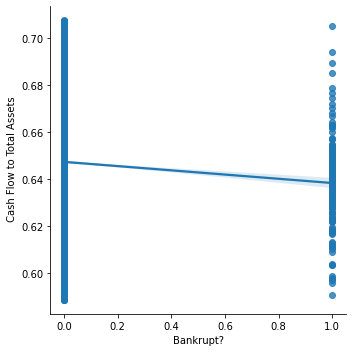

<Figure size 648x432 with 0 Axes>

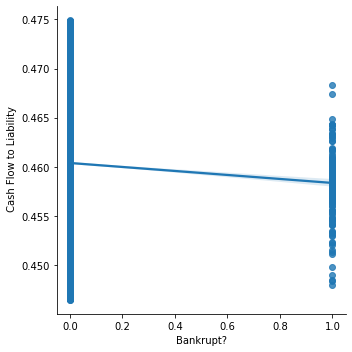

<Figure size 648x432 with 0 Axes>

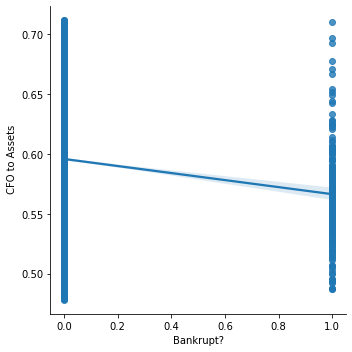

<Figure size 648x432 with 0 Axes>

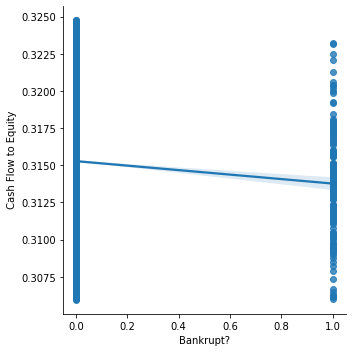

<Figure size 648x432 with 0 Axes>

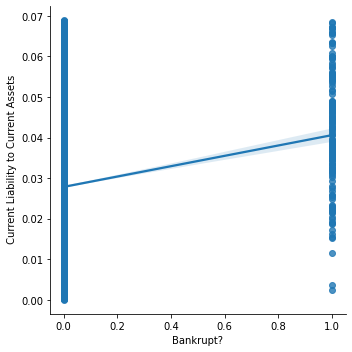

<Figure size 648x432 with 0 Axes>

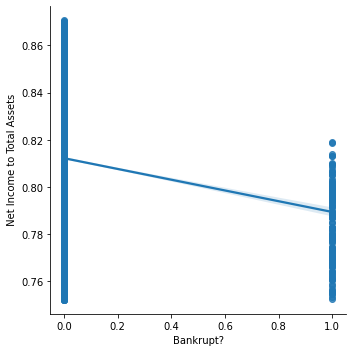

<Figure size 648x432 with 0 Axes>

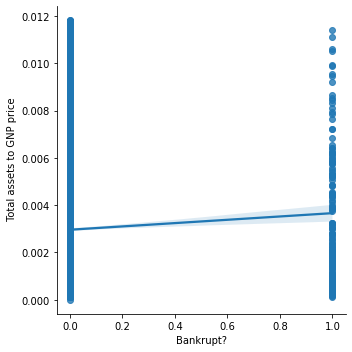

<Figure size 648x432 with 0 Axes>

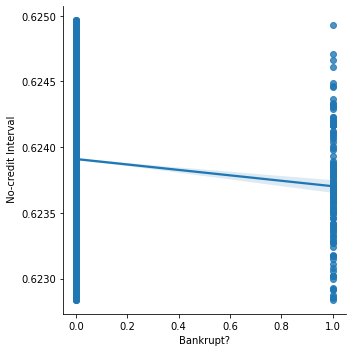

<Figure size 648x432 with 0 Axes>

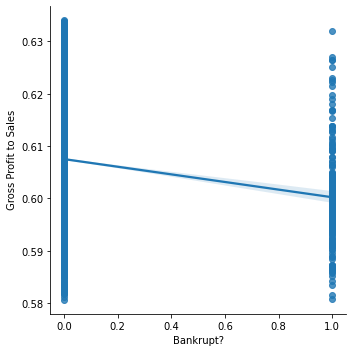

<Figure size 648x432 with 0 Axes>

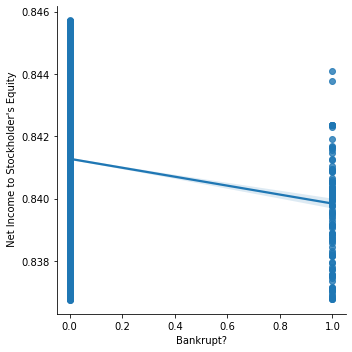

<Figure size 648x432 with 0 Axes>

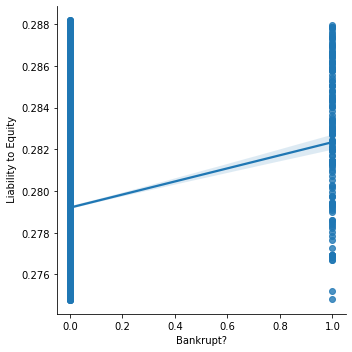

<Figure size 648x432 with 0 Axes>

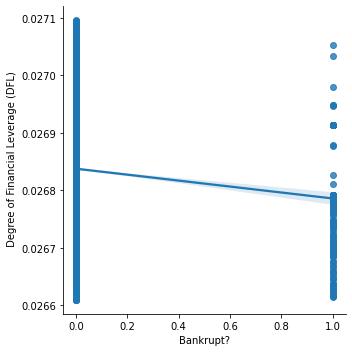

<Figure size 648x432 with 0 Axes>

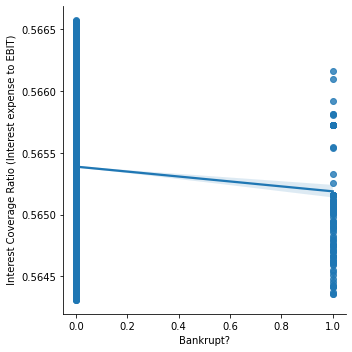

<Figure size 648x432 with 0 Axes>

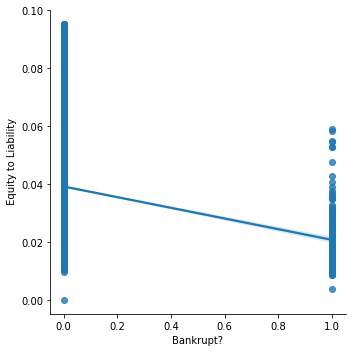

In [38]:
# LM plot showing relation between Dependent and Independent Variables. 

for i in columns:
  fig = plt.figure(figsize=(9, 6))
  # ax = fig.gca()
  # df.boxplot(column = i, by = 'Bankrupt?', ax = ax)
  # ax.set_ylabel(i)
  sns.lmplot(x='Bankrupt?', y=i, data=df)
  plt.show()

**CONCLUSION--**
1. Bankruptcy is more likely, if the value of features such as ROA(A) value is low.
2. Value of features such as Current Liability to current Assets is more likely to cause bankruptcy.
3. For higher values of features like Retained Earnings to Total Assets, a company is likely to stay aﬂoat.


##<h1> Feature Selection

<h3>1. Using Random Forest

In [40]:
# creating the copy of original dataframe.

df1 = df.iloc[:,1:].copy()
X = df1
Y = df['Bankrupt?']

In [41]:
# using Gini entropy as the parameter.

rf = RandomForestClassifier(n_estimators=100,criterion='gini',class_weight='balanced',random_state= 21,n_jobs=-1)

In [42]:
#fitting the model
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [43]:
# create a feature imp df
feature_importance_df = pd.DataFrame(rf.feature_importances_)
feature_importance_df.shape

(93, 1)

In [44]:
# concat the dfs
concatenated_imp_df = pd.concat([pd.DataFrame(X.columns),feature_importance_df],axis=1)
concatenated_imp_df.columns=['features','imp']
concatenated_imp_df = concatenated_imp_df.sort_values(by='imp',ascending=False)
#Chosing out top 25 columns
#final_df = concatenated_imp_df.head(25)
concatenated_imp_df.head(5)

,features,imp
42,Net profit before tax/Paid-in capital,0.052006
18,Persistent EPS in the Last Four Seasons,0.044437
84,Net Income to Total Assets,0.043971
33,Quick Ratio,0.043285
92,Equity to Liability,0.041351


In [45]:
concatenated_imp_df.tail(5)

,features,imp
47,Inventory Turnover Rate (times),0.003185
76,Current Liability to Liability,0.003177
86,No-credit Interval,0.003161
43,Inventory and accounts receivable/Net value,0.002677
40,Contingent liabilities/Net worth,0.001599


**These are top 5 and bottom 5 features after sorting according to feature importance.**

In [46]:
concatenated_imp_df.iloc[:26]

,features,imp
42,Net profit before tax/Paid-in capital,0.052006
18,Persistent EPS in the Last Four Seasons,0.044437
84,Net Income to Total Assets,0.043971
33,Quick Ratio,0.043285
92,Equity to Liability,0.041351
67,Retained Earnings to Total Assets,0.038452
39,Borrowing dependency,0.037289
9,Continuous interest rate (after tax),0.032081
36,Debt ratio %,0.026643
68,Total income/Total expense,0.025455


In [47]:
# Chosing out top 25 columns
final_df = concatenated_imp_df.head(25)
final_df

,features,imp
42,Net profit before tax/Paid-in capital,0.052006
18,Persistent EPS in the Last Four Seasons,0.044437
84,Net Income to Total Assets,0.043971
33,Quick Ratio,0.043285
92,Equity to Liability,0.041351
67,Retained Earnings to Total Assets,0.038452
39,Borrowing dependency,0.037289
9,Continuous interest rate (after tax),0.032081
36,Debt ratio %,0.026643
68,Total income/Total expense,0.025455


<h3> 2. Using Information Gain.

In [48]:
# create a dataframe which consist of Features along with their Importances.
from sklearn.feature_selection import mutual_info_classif
feature_importance = mutual_info_classif(X,Y)
feature_df = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(feature_importance)],axis=1)
feature_df.columns = ['Features','Importances']
feature_df = feature_df.sort_values(by='Importances',ascending=False)


In [49]:
feature_df.head(5)

,Features,Importances
18,Persistent EPS in the Last Four Seasons,0.042339
42,Net profit before tax/Paid-in capital,0.038139
88,Net Income to Stockholder's Equity,0.037317
84,Net Income to Total Assets,0.036895
22,Per Share Net profit before tax (Yuan ¥),0.035892


In [50]:
feature_df.tail(5)

,Features,Importances
70,Current Asset Turnover Rate,0.000000
40,Contingent liabilities/Net worth,0.000000
55,Current Assets/Total Assets,0.000000
62,Inventory/Current Liability,0.000000
49,Net Worth Turnover Rate (times),0.000000


**These are top 5 and bottom 5 features after sorting according to feature importance.**

In [51]:
feature_df.iloc[40:50]

,Features,Importances
61,Inventory/Working Capital,0.018429
64,Working Capital/Equity,0.018279
5,Operating Profit Rate,0.018126
58,Cash/Current Liability,0.016096
60,Operating Funds to Liability,0.015721
25,After-tax Net Profit Growth Rate,0.015183
56,Cash/Total Assets,0.014927
12,Cash flow rate,0.014703
4,Realized Sales Gross Margin,0.012906
3,Operating Gross Margin,0.012862


In [52]:
#Top 50 important features
final_features_df = feature_df.head(50)

**Taking out top 50 features from Information Gain Algorithm**

In [53]:
list_rf = final_df['features'].values.tolist()
list_ig = final_features_df['Features'].values.tolist()

In [54]:
final_list = list((set(list_rf)).intersection(set(list_ig)))
temp_list = final_list.copy()
len(temp_list)

23

In [55]:
# list consisting intersection of Random Forest and Information Gain Algorithm.
temp_list

[' Retained Earnings to Total Assets',
 ' ROA(C) before interest and depreciation before interest',
 ' Net Value Per Share (C)',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 " Net Income to Stockholder's Equity",
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' ROA(A) before interest and % after tax',
 ' Total income/Total expense',
 ' Net Value Per Share (B)',
 ' Continuous interest rate (after tax)',
 ' Equity to Liability',
 ' Net profit before tax/Paid-in capital',
 ' Borrowing dependency',
 ' Liability to Equity',
 ' After-tax net Interest Rate',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Income to Total Assets',
 ' Non-industry income and expenditure/revenue']

**We have taken the Intersection from the features of both Algo. We've reduced to 23 features**

In [56]:
final_features_df = df[final_list]
final_features_df.head()

,Retained Earnings to Total Assets,ROA(C) before interest and depreciation before interest,Net Value Per Share (C),Current Ratio,Quick Ratio,Total debt/Total net worth,Net Income to Stockholder's Equity,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),ROA(A) before interest and % after tax,Total income/Total expense,Net Value Per Share (B),Continuous interest rate (after tax),Equity to Liability,Net profit before tax/Paid-in capital,Borrowing dependency,Liability to Equity,After-tax net Interest Rate,Debt ratio %,Net worth/Assets,ROA(B) before interest and depreciation after tax,Net Income to Total Assets,Non-industry income and expenditure/revenue
0,0.931097,0.476527,0.147950,0.002259,0.001208,0.009273,0.840115,0.214711,0.138736,0.535543,0.002022,0.147950,0.781567,0.016469,0.137757,0.376271,0.281449,0.809312,0.207576,0.792424,0.527277,0.796750,0.303466
1,0.931065,0.464291,0.182251,0.006016,0.004039,0.012502,0.839969,0.208944,0.169918,0.538214,0.002226,0.182251,0.781506,0.020794,0.168962,0.376760,0.283846,0.809301,0.171176,0.828824,0.516730,0.795297,0.303556
2,0.931097,0.426071,0.193713,0.011543,0.005348,0.009273,0.836774,0.180581,0.142803,0.499019,0.002060,0.177911,0.781567,0.016474,0.148036,0.379093,0.281449,0.809312,0.207516,0.792484,0.472295,0.774670,0.303466
3,0.931097,0.399844,0.154187,0.004194,0.002896,0.009572,0.840115,0.193722,0.148603,0.535543,0.002236,0.154187,0.781567,0.023982,0.147561,0.379743,0.281721,0.809312,0.151465,0.848535,0.457733,0.796750,0.303350
4,0.913850,0.465022,0.167502,0.006022,0.003727,0.005150,0.839973,0.212537,0.168412,0.538432,0.002224,0.167502,0.781550,0.035490,0.167461,0.375025,0.278514,0.809304,0.106509,0.893491,0.522298,0.795016,0.303475


In [57]:
final_list.append('Bankrupt?')
final_list

[' Retained Earnings to Total Assets',
 ' ROA(C) before interest and depreciation before interest',
 ' Net Value Per Share (C)',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 " Net Income to Stockholder's Equity",
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' ROA(A) before interest and % after tax',
 ' Total income/Total expense',
 ' Net Value Per Share (B)',
 ' Continuous interest rate (after tax)',
 ' Equity to Liability',
 ' Net profit before tax/Paid-in capital',
 ' Borrowing dependency',
 ' Liability to Equity',
 ' After-tax net Interest Rate',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' ROA(B) before interest and depreciation after tax',
 ' Net Income to Total Assets',
 ' Non-industry income and expenditure/revenue',
 'Bankrupt?']

In [58]:
final_company_df = df[final_list]
final_company_df

,Retained Earnings to Total Assets,ROA(C) before interest and depreciation before interest,Net Value Per Share (C),Current Ratio,Quick Ratio,Total debt/Total net worth,Net Income to Stockholder's Equity,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),ROA(A) before interest and % after tax,Total income/Total expense,Net Value Per Share (B),Continuous interest rate (after tax),Equity to Liability,Net profit before tax/Paid-in capital,Borrowing dependency,Liability to Equity,After-tax net Interest Rate,Debt ratio %,Net worth/Assets,ROA(B) before interest and depreciation after tax,Net Income to Total Assets,Non-industry income and expenditure/revenue,Bankrupt?
0,0.931097,0.476527,0.147950,0.002259,0.001208,0.009273,0.840115,0.214711,0.138736,0.535543,0.002022,0.147950,0.781567,0.016469,0.137757,0.376271,0.281449,0.809312,0.207576,0.792424,0.527277,0.796750,0.303466,1
1,0.931065,0.464291,0.182251,0.006016,0.004039,0.012502,0.839969,0.208944,0.169918,0.538214,0.002226,0.182251,0.781506,0.020794,0.168962,0.376760,0.283846,0.809301,0.171176,0.828824,0.516730,0.795297,0.303556,1
2,0.931097,0.426071,0.193713,0.011543,0.005348,0.009273,0.836774,0.180581,0.142803,0.499019,0.002060,0.177911,0.781567,0.016474,0.148036,0.379093,0.281449,0.809312,0.207516,0.792484,0.472295,0.774670,0.303466,1
3,0.931097,0.399844,0.154187,0.004194,0.002896,0.009572,0.840115,0.193722,0.148603,0.535543,0.002236,0.154187,0.781567,0.023982,0.147561,0.379743,0.281721,0.809312,0.151465,0.848535,0.457733,0.796750,0.303350,1
4,0.913850,0.465022,0.167502,0.006022,0.003727,0.005150,0.839973,0.212537,0.168412,0.538432,0.002224,0.167502,0.781550,0.035490,0.167461,0.375025,0.278514,0.809304,0.106509,0.893491,0.522298,0.795016,0.303475,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.925611,0.493687,0.175045,0.010451,0.005457,0.006655,0.840359,0.216602,0.172102,0.539468,0.002266,0.175045,0.781588,0.029890,0.171111,0.373823,0.279606,0.809331,0.124618,0.875382,0.543230,0.799927,0.303510,0
6815,0.932629,0.475162,0.181324,0.009259,0.006741,0.004623,0.840306,0.216697,0.172780,0.538269,0.002288,0.181324,0.781586,0.038284,0.171805,0.372505,0.278132,0.809327,0.099253,0.900747,0.524172,0.799748,0.303520,0
6816,0.932000,0.472725,0.199612,0.016270,0.012249,0.001392,0.840138,0.210929,0.173232,0.533744,0.002239,0.199570,0.781546,0.052838,0.172287,0.369637,0.275789,0.809317,0.038939,0.961061,0.520638,0.797778,0.303512,0
6817,0.939613,0.506264,0.213392,0.012782,0.007256,0.003816,0.841084,0.228326,0.185584,0.559911,0.002395,0.213392,0.781663,0.044009,0.182498,0.369649,0.277547,0.809399,0.086979,0.913021,0.554045,0.811808,0.303498,0


In [59]:
# split the new df to X1 and Y1
X1 =final_company_df.drop('Bankrupt?', axis=1)
Y1 = final_company_df['Bankrupt?']

In [60]:
# function to plot distribution and box plot for selected features.

def dist_and_box(list_):
  for i in list_ :
      plt.figure(figsize=(12,6))
      plt.subplot(1, 2, 1)
      fig = sns.distplot(X1[i])
      fig.set_xlabel(i)     
      
      plt.subplot(1, 2, 2)
      fig = sns.boxplot(y=X1[i])
      fig.set_title('')
      fig.set_ylabel(i)

      plt.show()


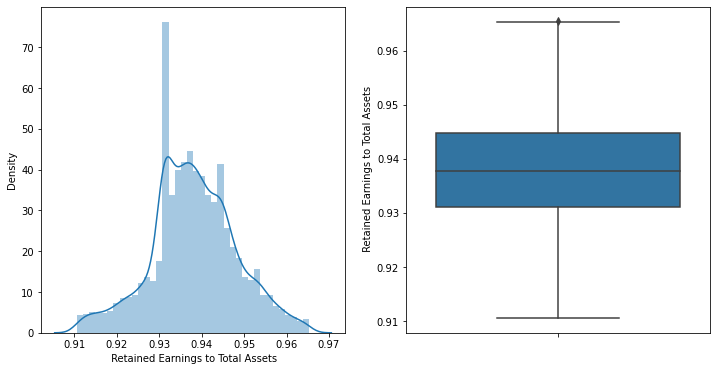

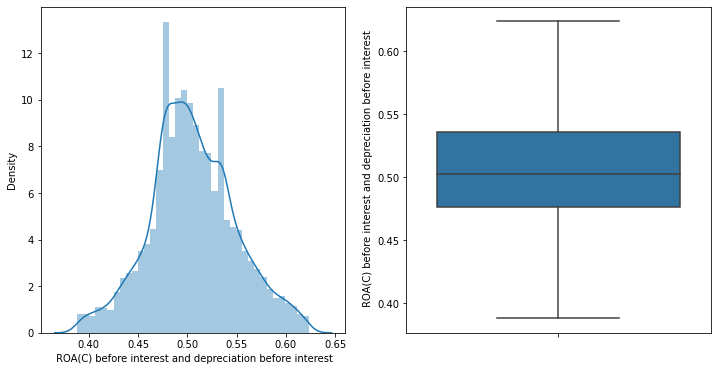

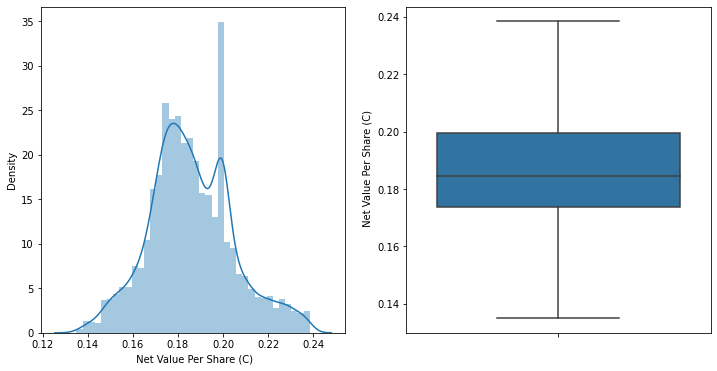

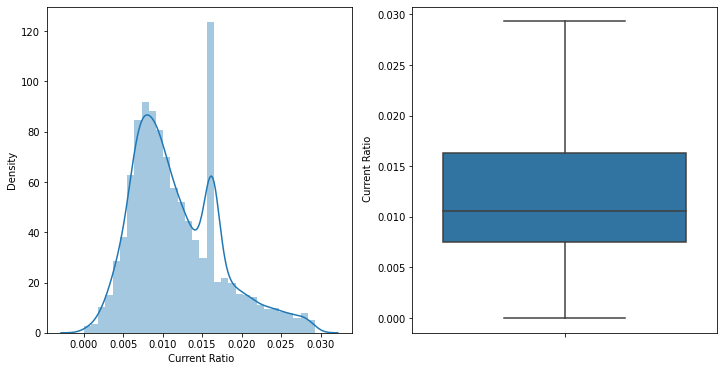

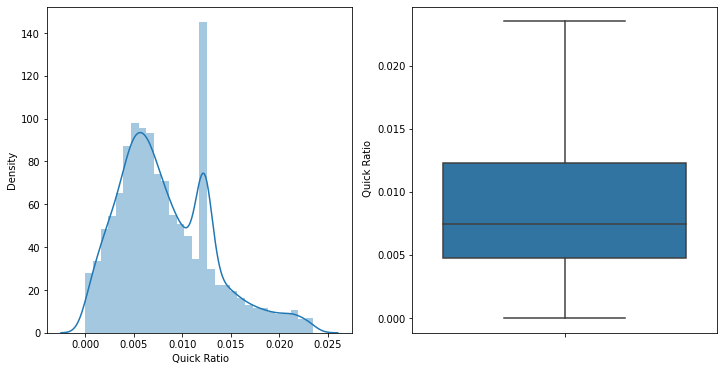

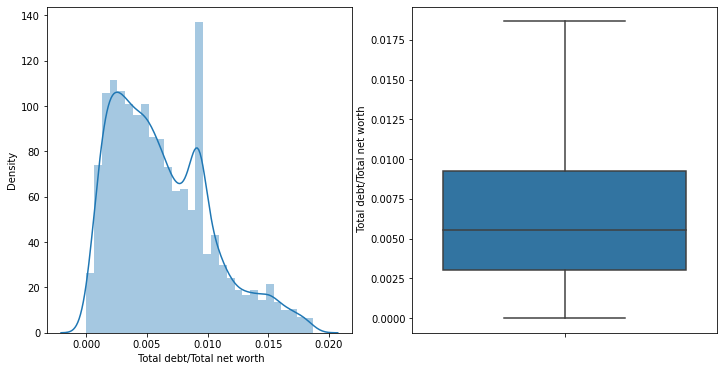

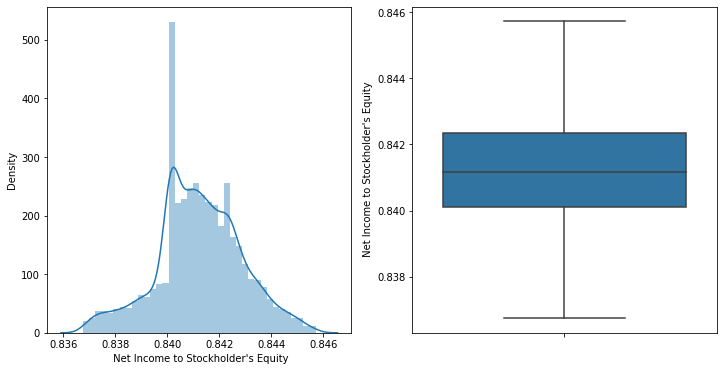

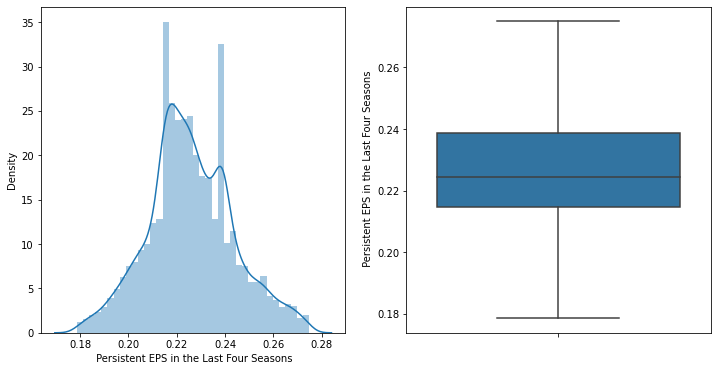

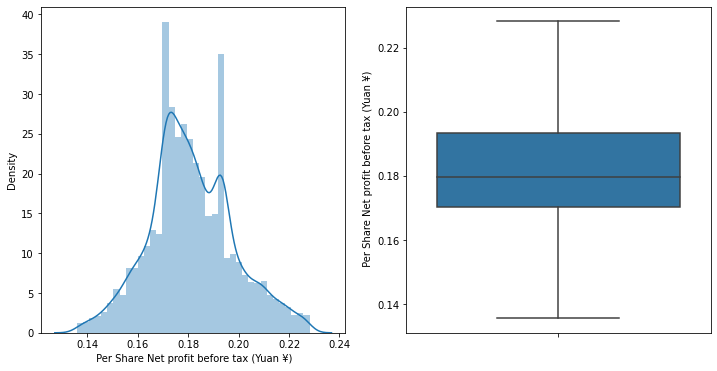

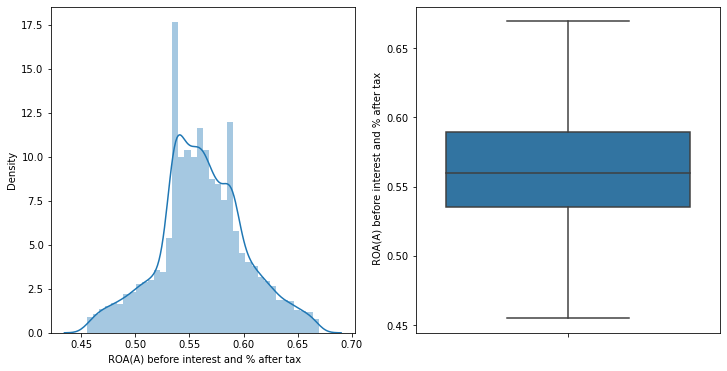

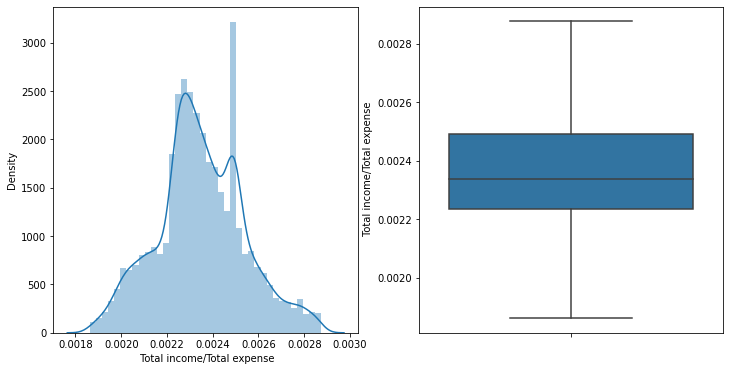

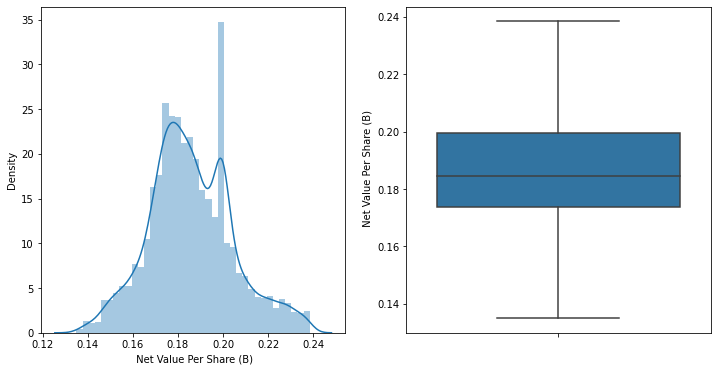

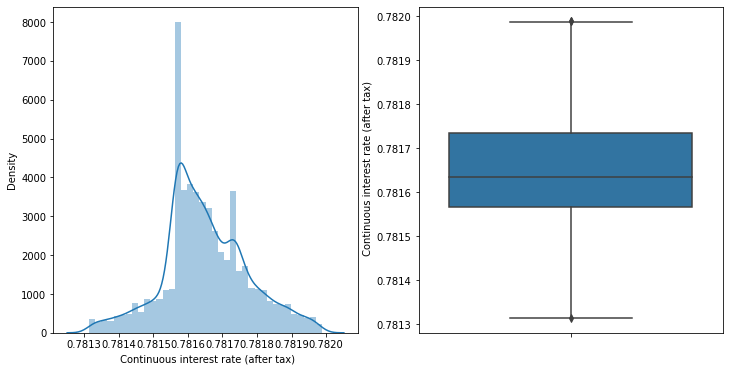

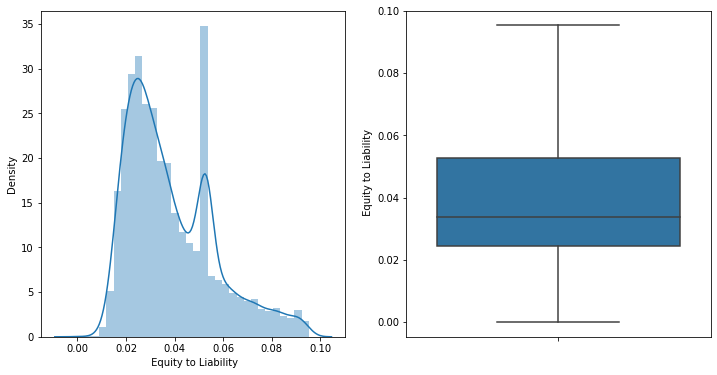

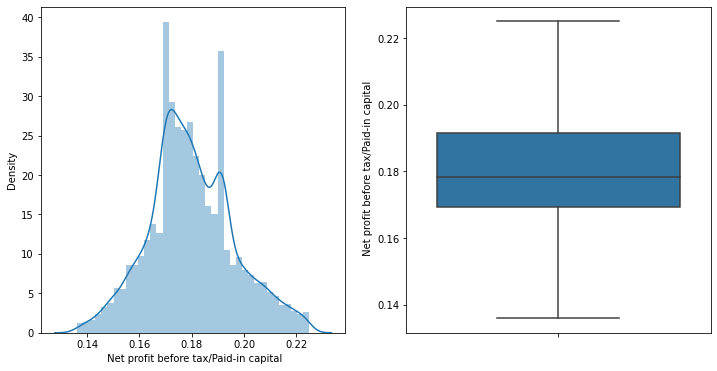

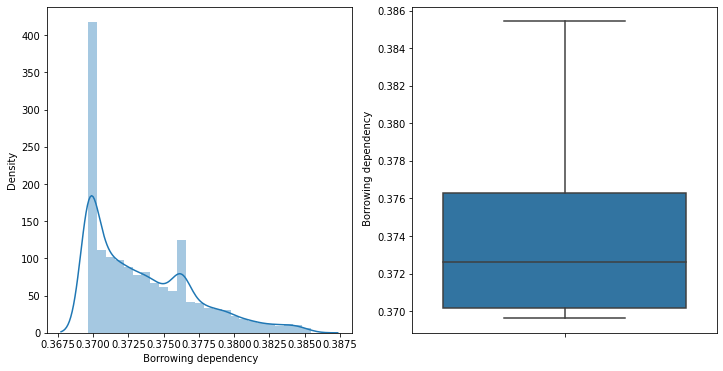

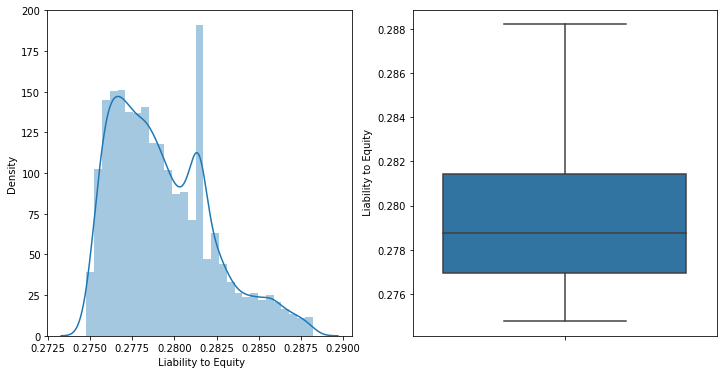

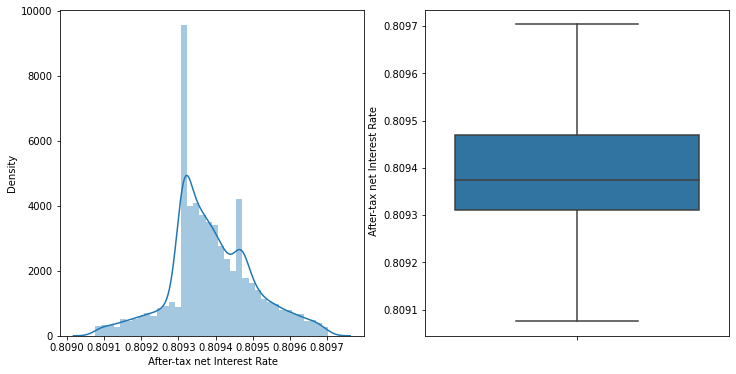

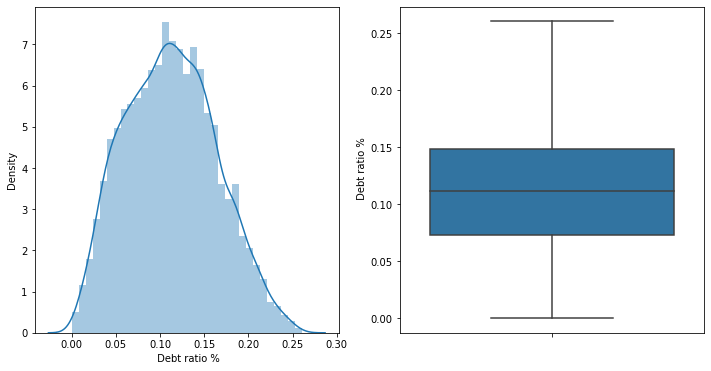

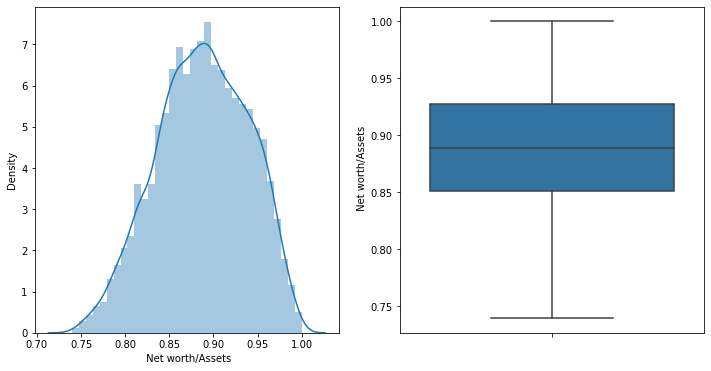

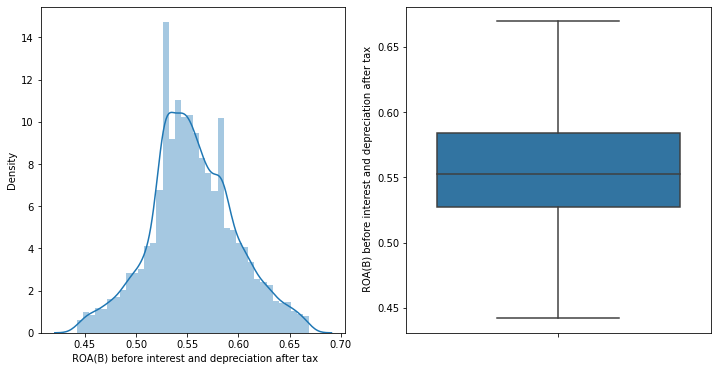

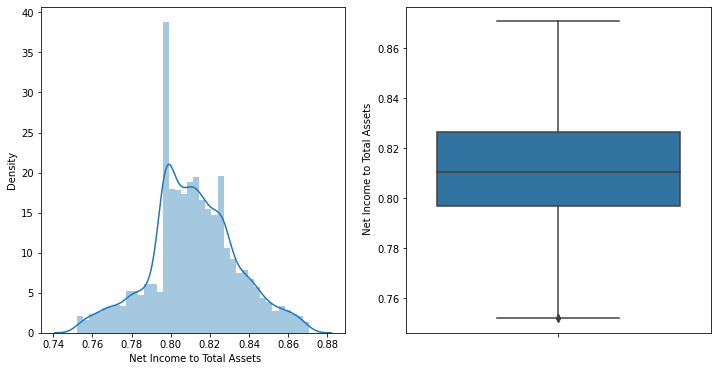

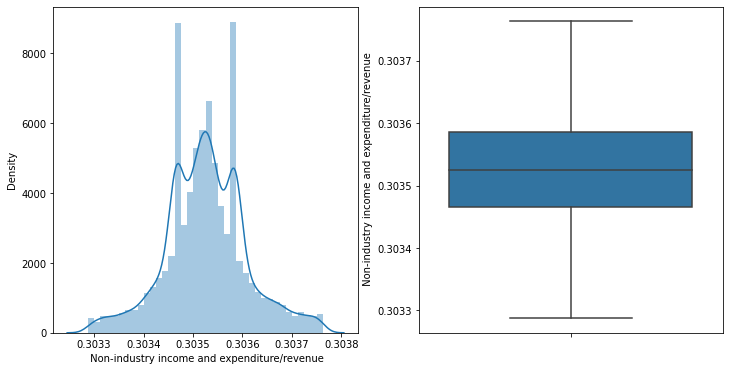

In [61]:
dist_and_box(temp_list)

**Above are the pair plot with Dependent Variable and final features after feature selection.**

<h2> Heatmap to Visualize Correlation.

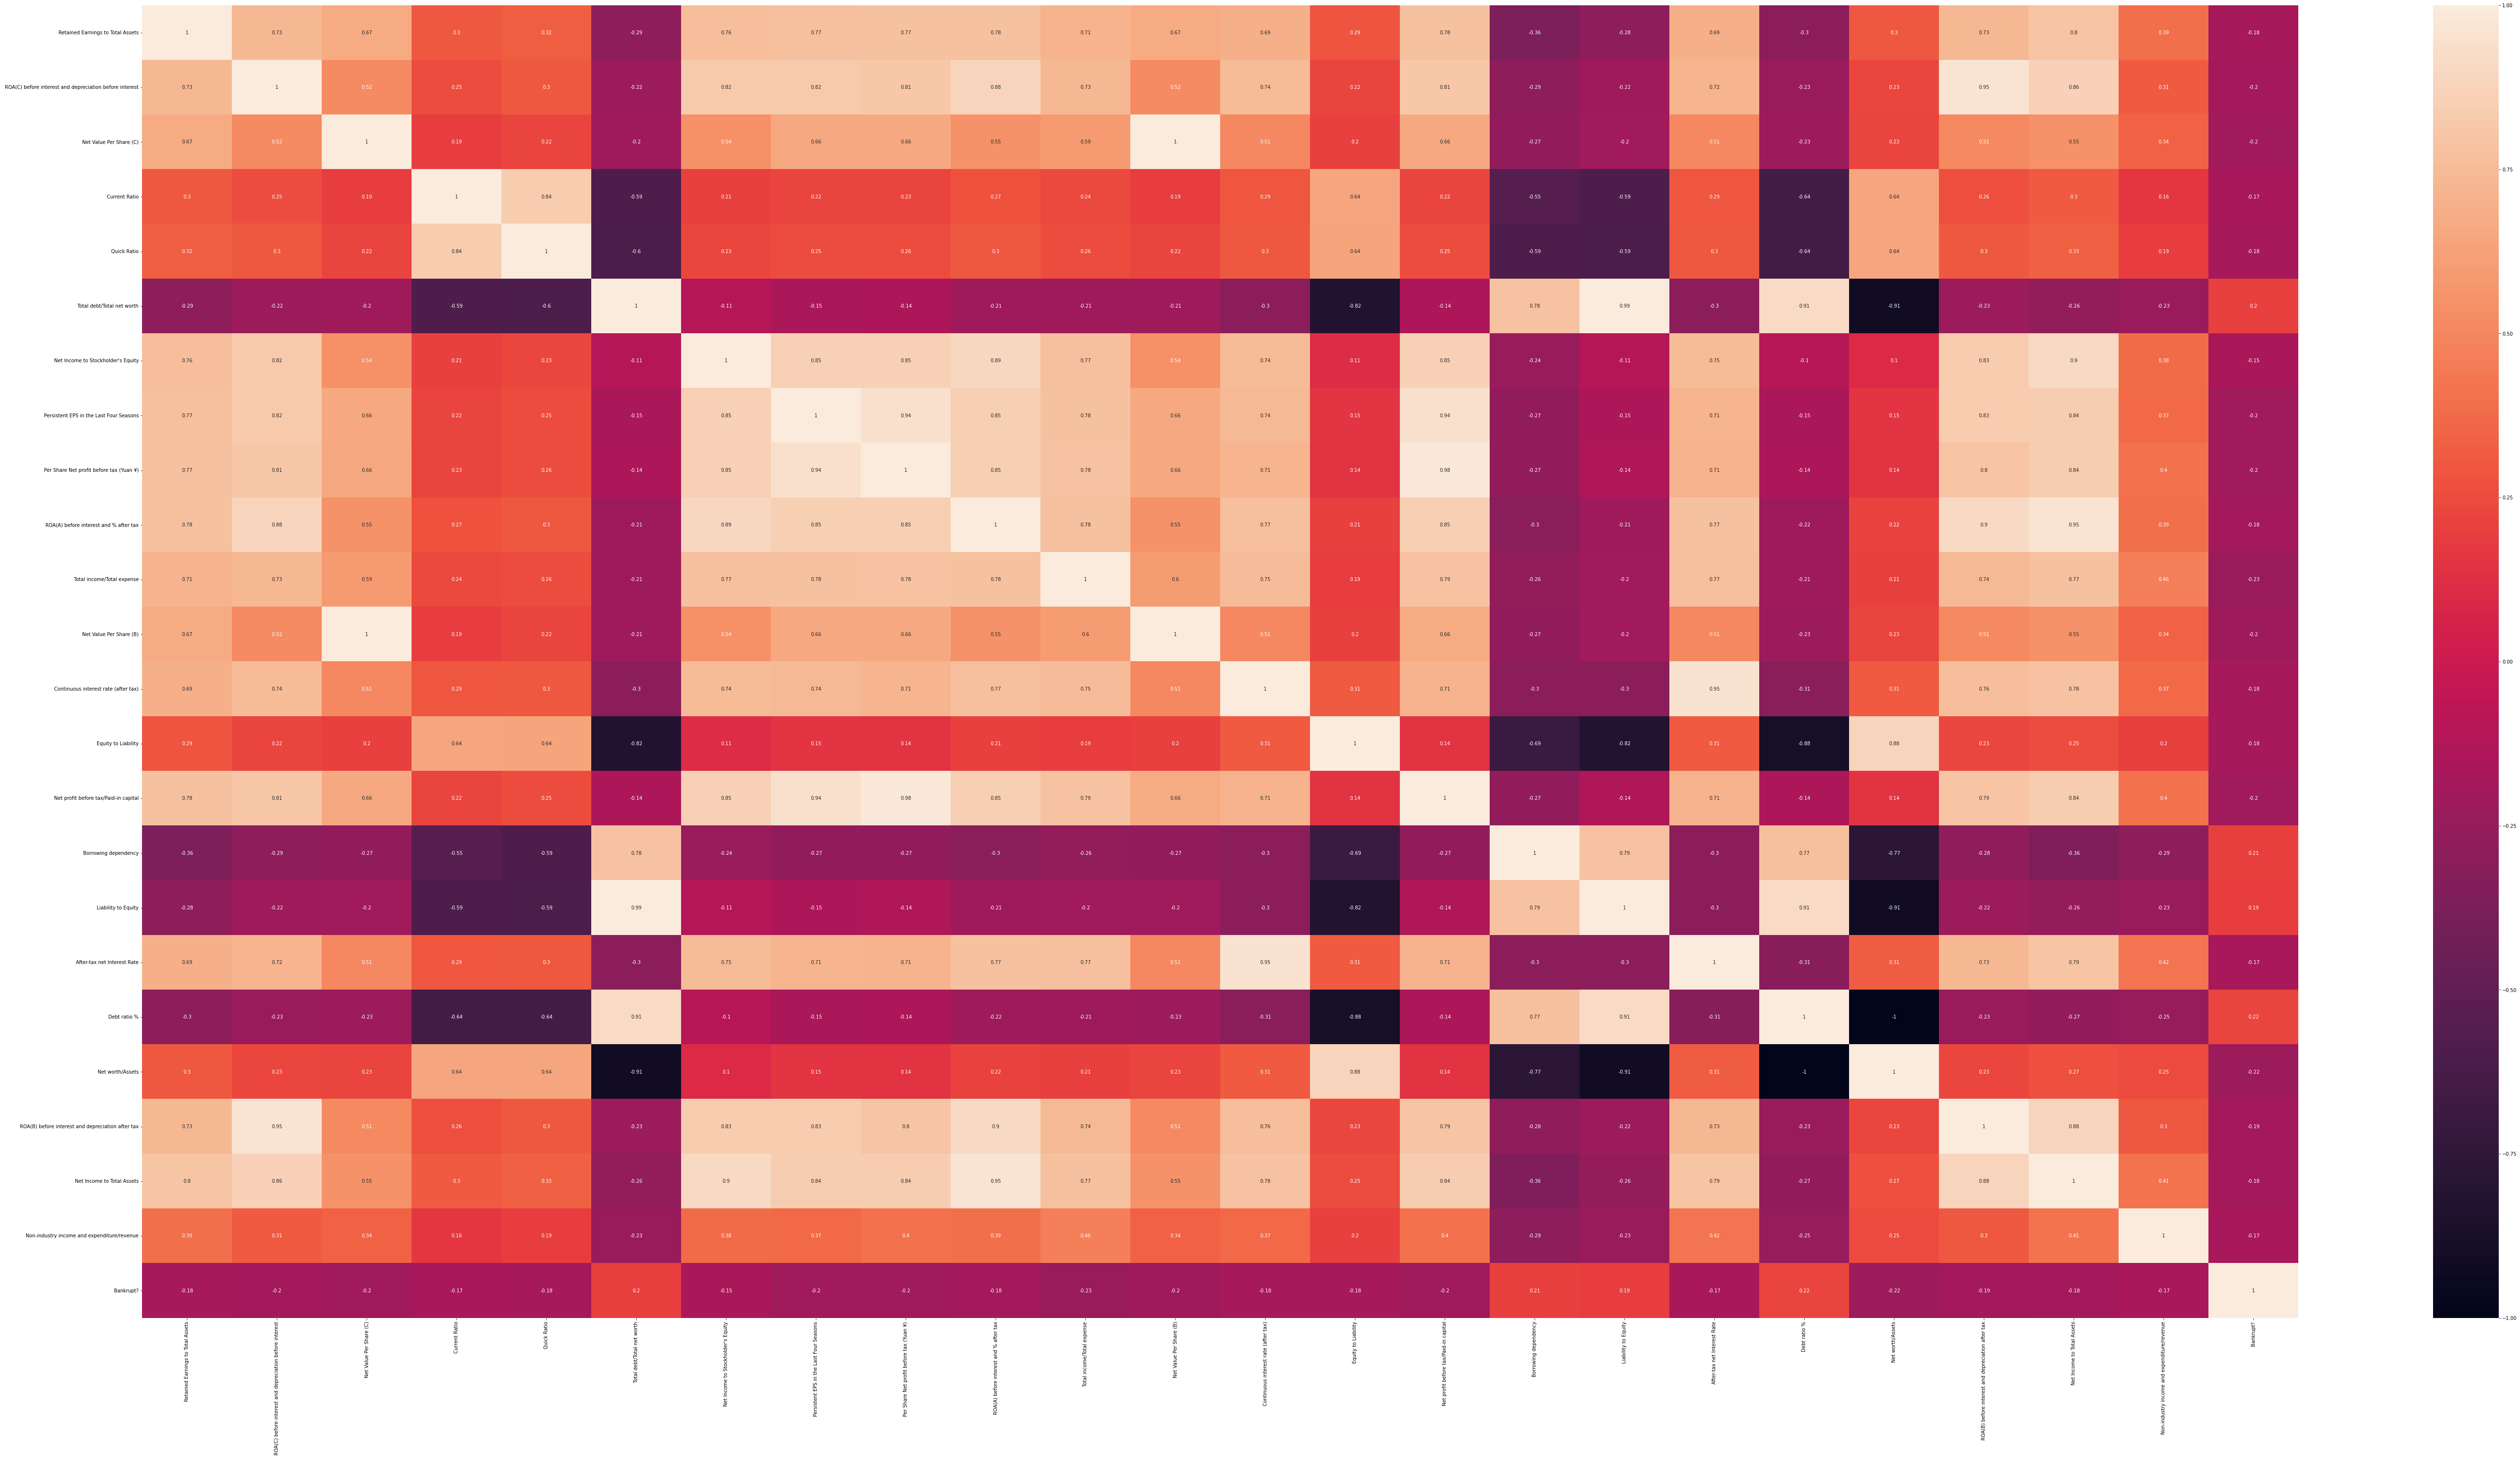

In [62]:
# heatmap to check the correlation among dependent and independent variables

fig, ax = plt.subplots(figsize=(100,50))
sns.heatmap(final_company_df.corr(), annot=True,ax = ax)

**We can see strong correlation among few features.**
1. The most negatively correlated feature was ' Net-Income to Total Assets' i.e -0.32
2. The most positively correlated feature was ' Debt Ratio' i.e +0.25.
3. Our dataset doesn't provide any modelling power with respect to linear algorithms


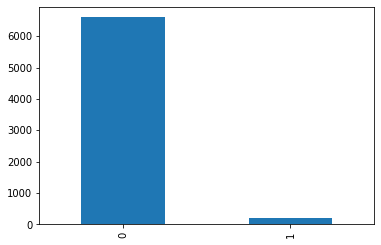

In [63]:
final_company_df['Bankrupt?'].value_counts().plot(kind = 'bar')

Dependent Variable has high class imbalance in the data.

In [64]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

## <h2> Anomaly Detection

In [65]:
# *Train and Test Split of the Dataset:-*

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X1,Y1,test_size=0.20, random_state=0, stratify=Y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# x_train_norm = scaler.fit_transform(x_train)
x_train_norm = scaler.fit_transform(train_X)
x_test_norm = scaler.transform(test_X)


In [69]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import recall_score
# from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest

In [70]:
# *Converting Dataset using StandardScalar:-*

# *Building Isolation Forest Model in UnSupervised Setting:-*

clf=IsolationForest(n_estimators=100, max_samples='auto',
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=0, verbose=0, contamination=0.033)
clf.fit(x_train_norm)

#Train Prediction
pred_train = clf.predict(x_train_norm)
print('accuracy score = ',accuracy_score(train_y,pred_train))
np.unique(pred_train, return_counts=True)
# target_names = ['bankrupt_company', 'normal_company']
print(classification_report(train_y, pred_train))
print ("AUC: ", "{:.1%}".format(roc_auc_score(train_y, pred_train)))
cm = confusion_matrix(train_y, pred_train )

#Test Prediction
pred_test = clf.predict(x_test_norm)
print('accuracy score = ',accuracy_score(test_y,pred_test))
print(classification_report(test_y, pred_test))
print ("AUC: ", "{:.1%}".format(roc_auc_score(test_y, pred_test)))
cm2 = confusion_matrix(test_y, pred_test)


accuracy score =  0.02914757103574702
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      5279
           1       0.03      0.90      0.06       176

    accuracy                           0.03      5455
   macro avg       0.01      0.30      0.02      5455
weighted avg       0.00      0.03      0.00      5455

AUC:  46.7%
accuracy score =  0.026392961876832845
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      1320
           1       0.03      0.82      0.05        44

    accuracy                           0.03      1364
   macro avg       0.01      0.27      0.02      1364
weighted avg       0.00      0.03      0.00      1364

AUC:  42.5%


##<h2> Model Building

In [71]:
# metric_report = pd.DataFrame(columns = ['logistic_regression','random_forest','SVM','gaussian_naive_bayes','KNN','XGBOOST'], index = ['test_acc','train_acc','test_precision','train_precision','test_recall','train_recall','test_f1-score','train_f1-score','test_auc','train_auc'])

In [72]:
#calling model result function.
model_result(x_train_norm,x_test_norm,train_y,test_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250, total=   1.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250, total=   1.6s
[CV] max_depth=4, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  3.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   3.2s
[CV] n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   3.4s
[CV] n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   3.4s
[CV] n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   3.4s
[CV] n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=250, min_samples_split=50, min_samples_leaf=40, max_depth=8, total=   3.4s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.6s
[CV] n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=50, min_samples_leaf=50, max_depth=6, total=   0.7s
[CV] n_estimators=50, min_samples_split=50, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


,logistic_regression,random_forest,SVM,gaussian_naive_bayes,KNN,XGBOOST
test_acc,0.837243,0.901760,0.835044,0.803519,0.965543,0.916422
train_acc,0.849863,0.911457,0.841613,0.814115,0.975435,0.956920
test_precision,0.149606,0.207792,0.147860,0.126667,0.200000,0.226562
train_precision,0.163351,0.252019,0.157371,0.133741,1.000000,0.428224
test_recall,0.863636,0.727273,0.863636,0.863636,0.022727,0.659091
train_recall,0.886364,0.886364,0.897727,0.869318,0.238636,1.000000
test_f1-score,0.255034,0.323232,0.252492,0.220930,0.040816,0.337209
train_f1-score,0.275862,0.392453,0.267797,0.231818,0.385321,0.599659
test_auc,0.911725,0.934108,0.913998,0.913998,0.697486,0.915186
train_auc,0.937246,0.968436,0.933997,0.933997,0.992861,0.998550


## Using SMOTE-ENN for oversampling and undersampling

In [73]:
# import somteenn for sampling
from imblearn.combine import SMOTEENN
smote_sample = SMOTEENN(random_state=0)

In [74]:
# fit
X_smote, y_smote = smote_sample.fit_resample(x_train_norm, train_y)

In [75]:
X_smote.shape

(9996, 23)

In [76]:
y_smote.shape

(9996,)

Using Tomek Links to create pairs of opposing instances that are very close together.

In [77]:
from imblearn.under_sampling import TomekLinks
tomek_links = TomekLinks(random_state=0,ratio='majority')
X_after_tomek, y_after_tomek = tomek_links.fit_sample(X_smote, y_smote)

In [78]:
X_after_tomek.shape

(9996, 23)

In [79]:
y_after_tomek.shape

(9996,)

**Tomek Links is of no use as the shape of X and Y remains same.**

Model Testing after Using Smote-ENN

In [80]:
# calcute the metric after sampling
model_result(X_after_tomek,x_test_norm,y_after_tomek,test_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   0.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250, total=   1.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=250, total=   1.6s
[CV] max_depth=4, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  3.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   1.2s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   1.3s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   1.2s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   1.3s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   1.2s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=12 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=12, total=   0.9s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=12 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=12, total=   0.9s
[CV] n_estimators=50, min_samples_spl

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


,logistic_regression,random_forest,SVM,gaussian_naive_bayes,KNN,XGBOOST
test_acc,0.837243,0.905425,0.833578,0.771261,0.911290,0.916422
train_acc,0.910064,0.909964,0.920968,0.879752,1.000000,0.954682
test_precision,0.149606,0.214765,0.141176,0.112717,0.218978,0.226562
train_precision,0.918540,0.964789,0.920211,0.863783,1.000000,0.987812
test_recall,0.863636,0.727273,0.818182,0.886364,0.681818,0.659091
train_recall,0.909627,0.860160,0.930365,0.915715,1.000000,0.925228
test_f1-score,0.255034,0.331606,0.240803,0.200000,0.331492,0.337209
train_f1-score,0.914062,0.909475,0.925260,0.888992,1.000000,0.955497
test_auc,0.911725,0.932886,0.908798,0.908798,0.794473,0.915186
train_auc,0.971560,0.984939,0.971248,0.971248,1.000000,0.993938


**<h2>Conclusion**

1. Initially built base models (without feature selection and sampling) had high accuracy values but all other metrics like recall and f1 score were very low.
2. If Accuracy is critical to the use case, then KNN model should be feature selection, to obtain a 96.6% Accuracy score.
3. If Recall is critical to the use case, then Gaussian Naive Bayes model should be  used with feature selection and SMOTEENN, to obtain a 88.6% Recall value.

4. If over-all performance is critical to the use case, then KNN  Model with, feature selection(RandomForest & Isolation forest) and SMOTE ENN can be used  to obtain F1 score of 33%.


<h2> Pipleline.

In [81]:
# Inference code.
# from imblearn.pipeline import make_pipeline
# o_step = np.linspace(0.1,1,20)

# pipe_line = make_pipeline(
#     SMOTEENN(),
#     TomekLinks(),
#     XGBClassifier()
# )

# gridcv = GridSearchCV(
#     estimator=pipe_line,
#     param_grid={
#         'smoteenn__sampling_strategy':o_step,
#         'tomeklinks__sampling_strategy':o_step    },
#     scoring='f1',
#     cv=4
# )

# output = gridcv.fit(X_after_tomek,y_after_tomek)

**<h1>THANK YOU**
